In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sp=pd.read_csv("StudentsPerformance.csv")

In [3]:
sp.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

In [4]:
sp.rename(columns={"parental level of education": "Parent_Ed", "test preparation course":"Course_Status",
                   "math score":"math","reading score":"reading", "writing score":"writing" },inplace=True)
sp.columns

Index(['gender', 'race/ethnicity', 'Parent_Ed', 'lunch', 'Course_Status',
       'math', 'reading', 'writing'],
      dtype='object')

In [5]:
sp.head()

gender race/ethnicity           Parent_Ed         lunch Course_Status  \
0  female        group B   bachelor's degree      standard          none   
1  female        group C        some college      standard     completed   
2  female        group B     master's degree      standard          none   
3    male        group A  associate's degree  free/reduced          none   
4    male        group C        some college      standard          none   

   math  reading  writing  
0    72       72       74  
1    69       90       88  
2    90       95       93  
3    47       57       44  
4    76       78       75

In [6]:
sp["P/F_Math"]=np.where(sp["math"]<40, "Fail","Pass")
sp["P/F_Math"].value_counts()

Pass    960
Fail     40
Name: P/F_Math, dtype: int64

In [7]:
sp["P/F_Read"]=np.where(sp["reading"]<40, "Fail","Pass")
sp["P/F_Read"].value_counts()

Pass    974
Fail     26
Name: P/F_Read, dtype: int64

In [8]:
sp["P/F_Write"]=np.where(sp["writing"]<40, "Fail","Pass")
sp["P/F_Write"].value_counts()

Pass    968
Fail     32
Name: P/F_Write, dtype: int64

In [9]:
sp["Three_Pass"]=np.where((sp["writing"]>40) & (sp["reading"]>40) & (sp["math"]>40), "Yes","No")
sp["Three_Pass"].value_counts()

Yes    939
No      61
Name: Three_Pass, dtype: int64

In [10]:
sp.head(10)

gender race/ethnicity           Parent_Ed         lunch Course_Status  \
0  female        group B   bachelor's degree      standard          none   
1  female        group C        some college      standard     completed   
2  female        group B     master's degree      standard          none   
3    male        group A  associate's degree  free/reduced          none   
4    male        group C        some college      standard          none   
5  female        group B  associate's degree      standard          none   
6  female        group B        some college      standard     completed   
7    male        group B        some college  free/reduced          none   
8    male        group D         high school  free/reduced     completed   
9  female        group B         high school  free/reduced          none   

   math  reading  writing P/F_Math P/F_Read P/F_Write Three_Pass  
0    72       72       74     Pass     Pass      Pass        Yes  
1    69       90       88     Pass     Pass      Pass        Yes  
2    90       95       93     Pass     Pass      Pass        Yes  
3    47       57       44     Pass     Pass      Pass        Yes  
4    76       78       75     Pass     Pass      Pass        Yes  
5    71       83       78     Pass     Pass      Pass        Yes  
6    88       95       92     Pass     Pass      Pass        Yes  
7    40       43       39     Pass     Pass      Fail         No  
8    64       64       67     Pass     Pass      Pass        Yes  
9    38       60       50     Fail     Pass      Pass         No

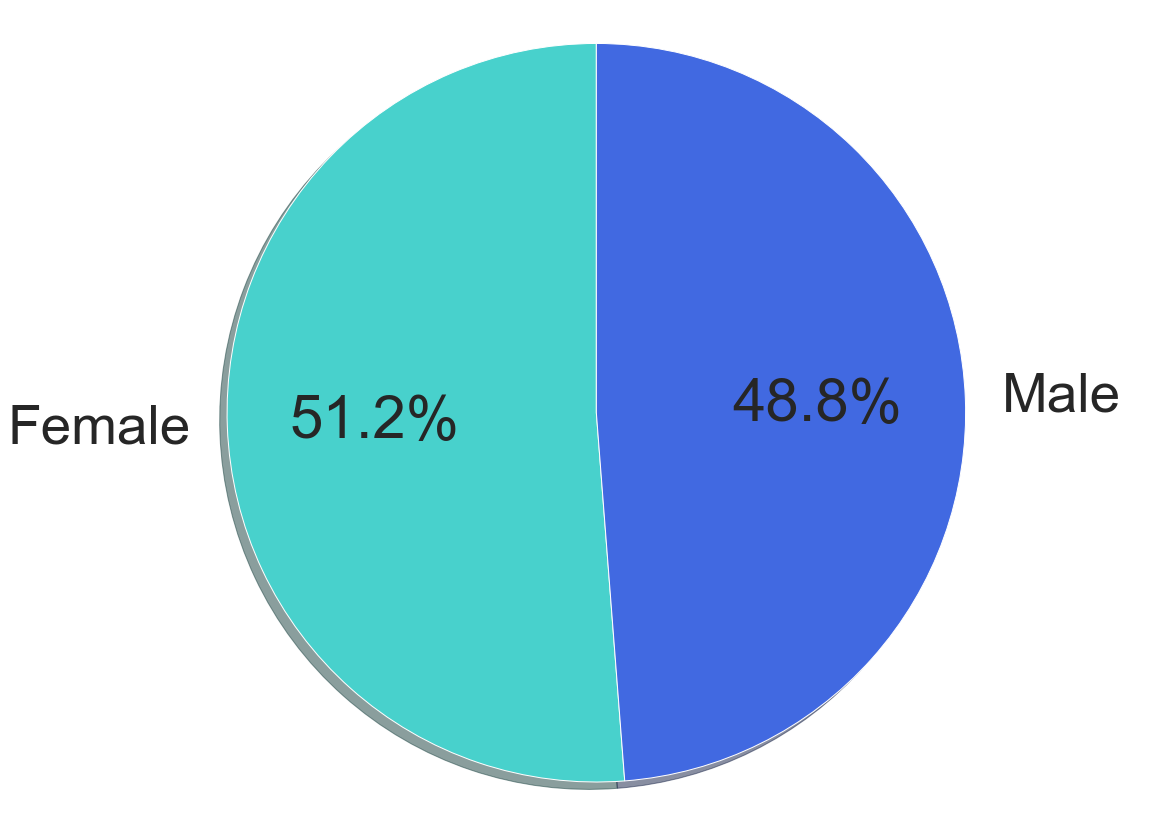

In [11]:
c=['mediumturquoise','royalblue']
l=['Female','Male']
sns.set(font_scale=5)
s=[sp[sp['Three_Pass']=='Yes']['gender'].value_counts()[0],
   sp[sp['Three_Pass']=='Yes']['gender'].value_counts()[1]]
fig,ax=plt.subplots(figsize=(20,15))
ax.pie(s,labels=l,autopct='%1.1f%%' ,startangle=90, shadow=True,colors=c)
plt.axis('equal')
plt.show()

It is observed that 'Male students' have a lower pass percentage that 'Female students' by almost 2.4%

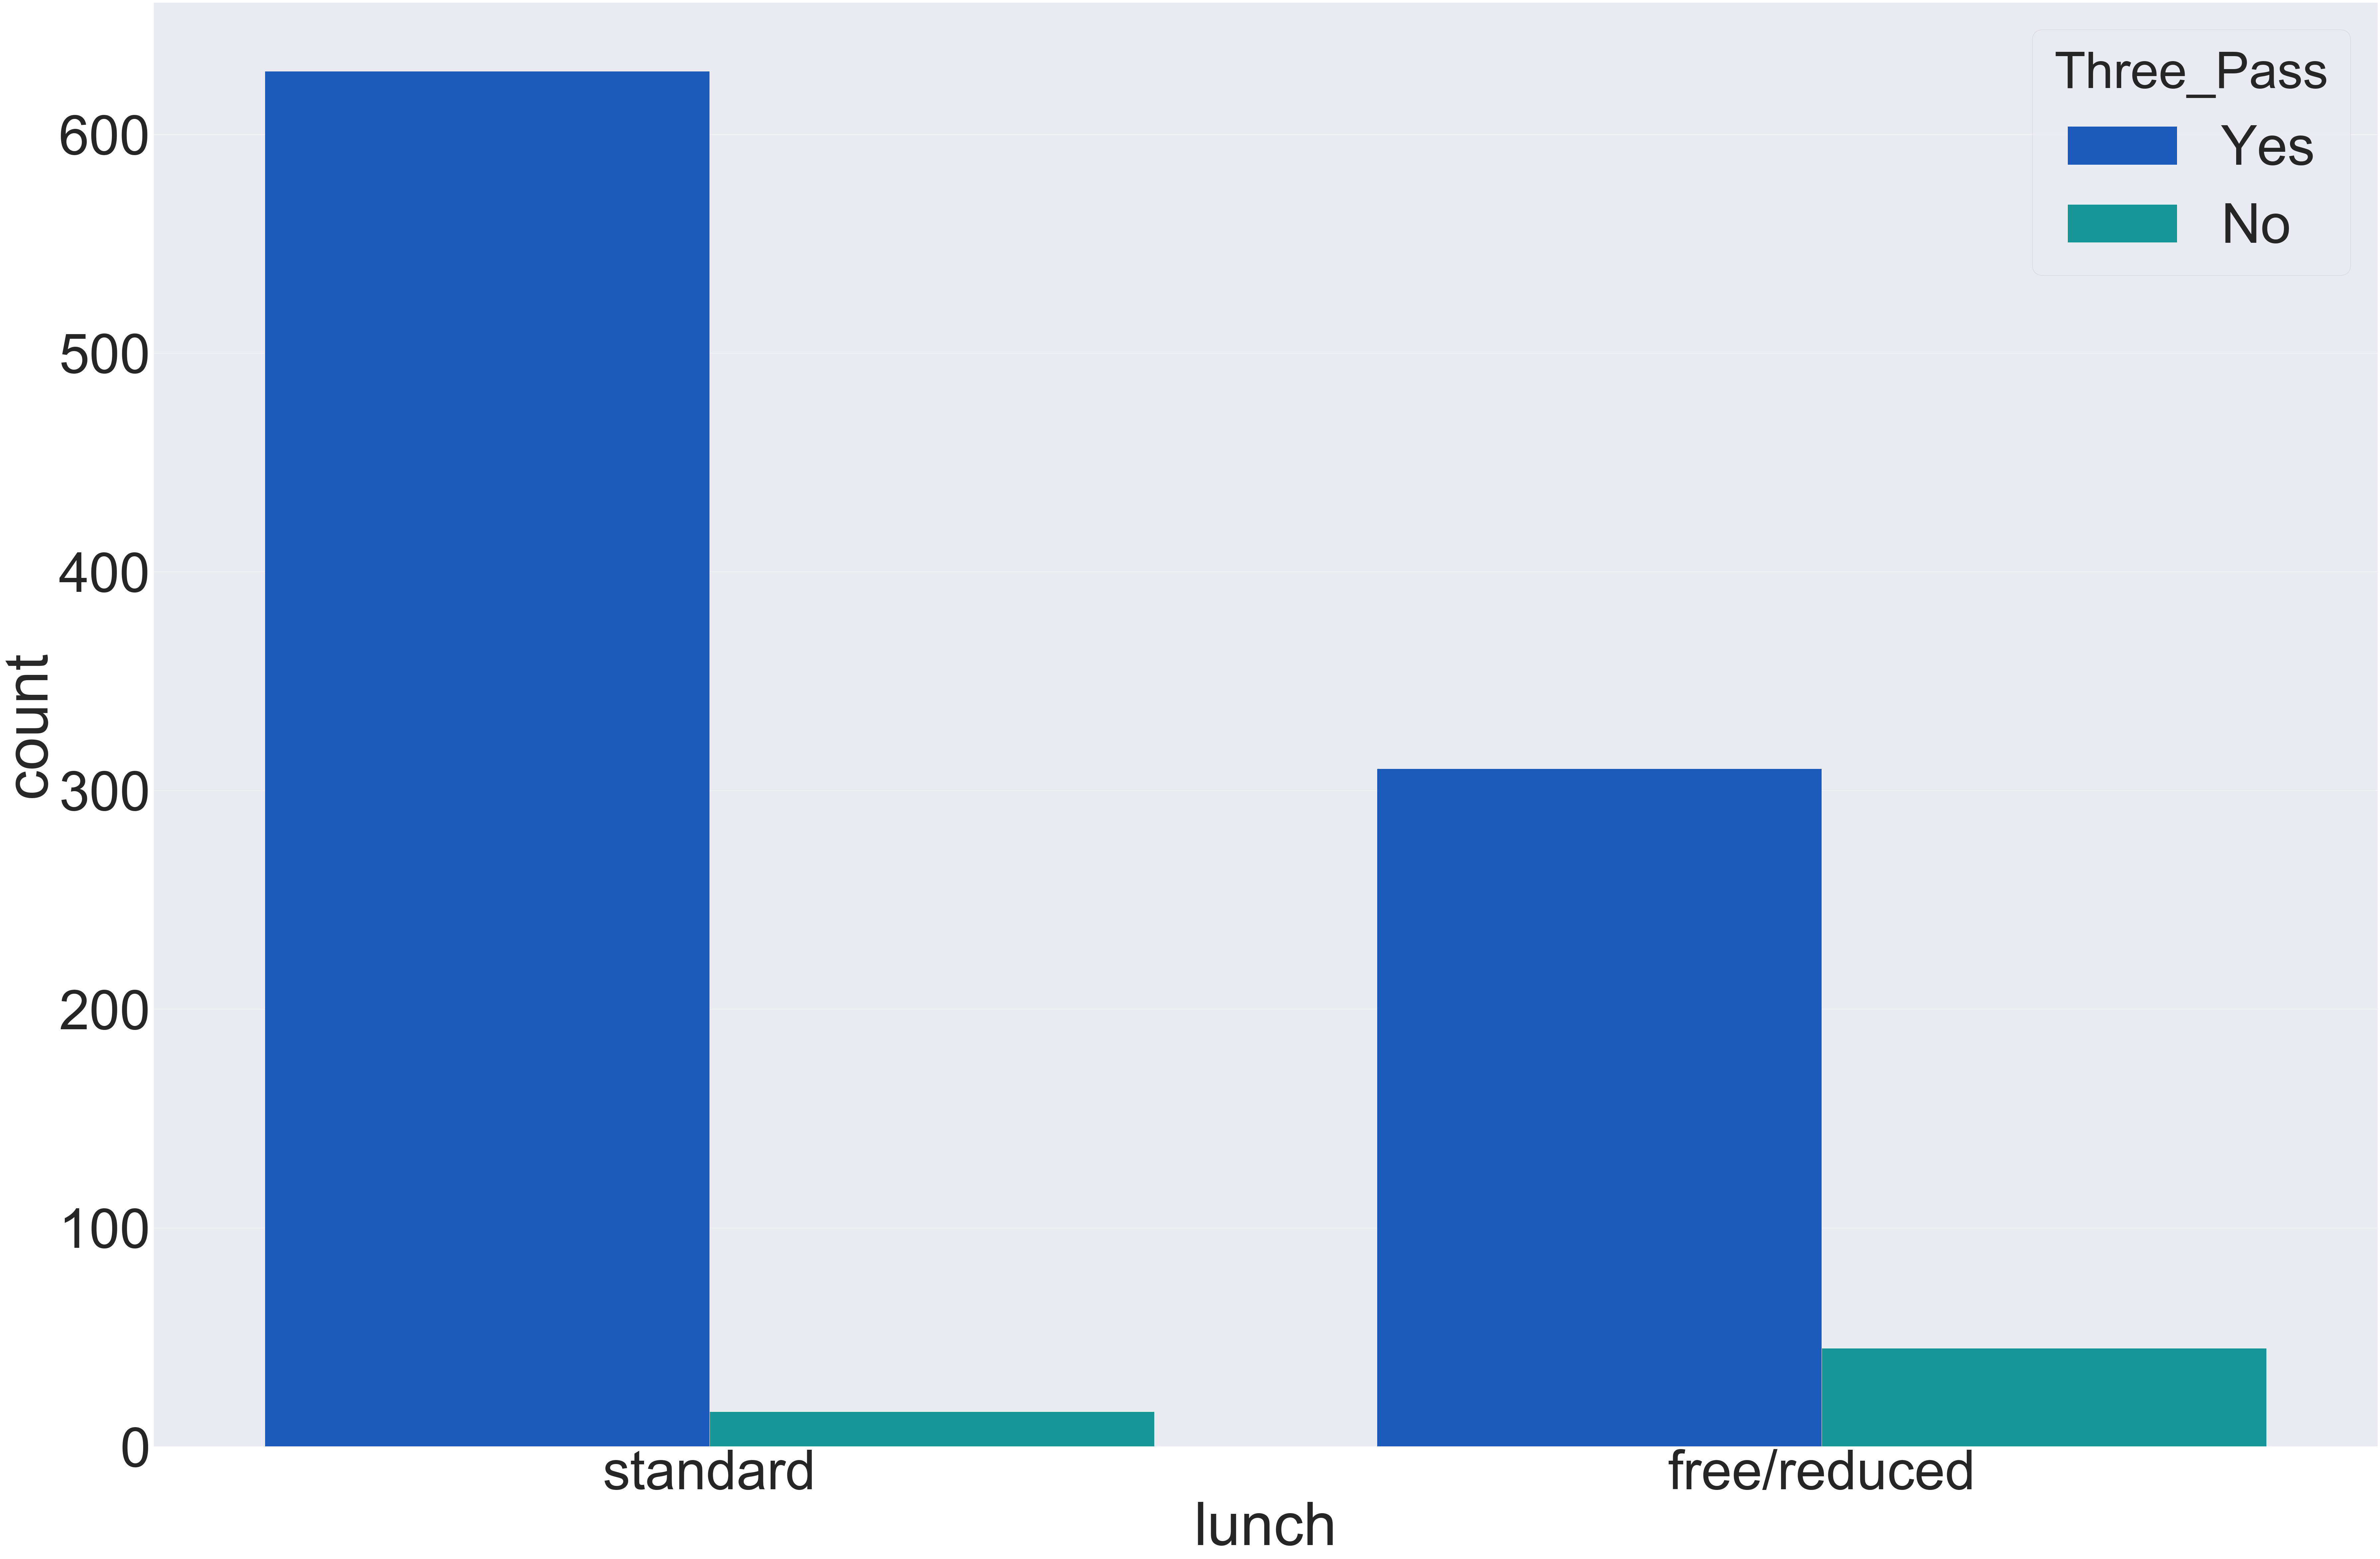

In [12]:
plt.rcParams['figure.figsize']=(120,80)
sns.set(font_scale=15)
sns.countplot(x="lunch", data=sp, hue="Three_Pass",palette='winter')
plt.show()

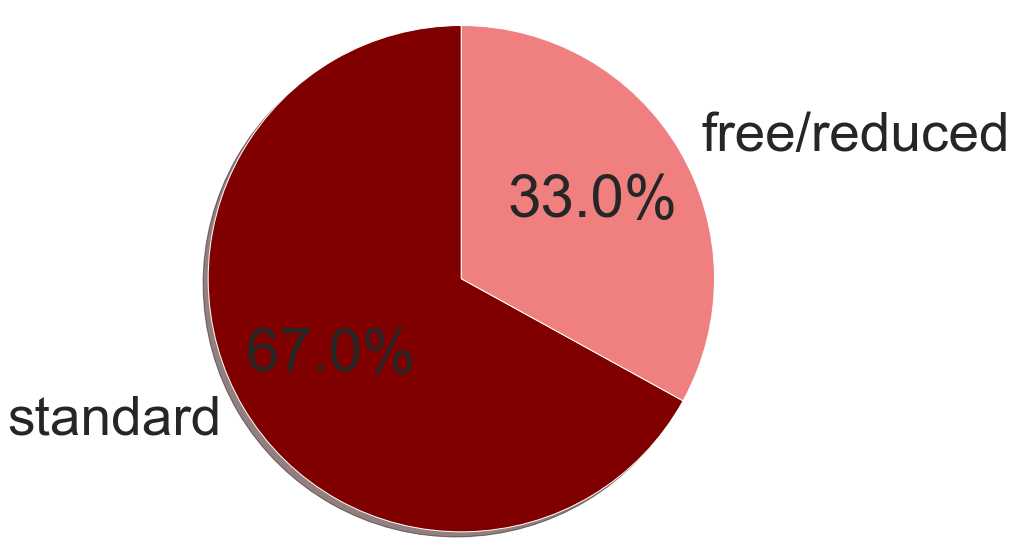

In [13]:
plt.rcParams['figure.figsize']=(120,150)
sns.set(font_scale=5)
c=['maroon','lightcoral']
l=['standard','free/reduced']
s=[sp[sp['Three_Pass']=='Yes']['lunch'].value_counts()[0],
   sp[sp['Three_Pass']=='Yes']['lunch'].value_counts()[1]]
fig,ax=plt.subplots(figsize=(10,10))
ax.pie(s,labels=l,autopct='%1.1f%%' ,startangle=90, shadow=True, colors=c)
plt.axis('equal')
plt.show()

Students with Standard meals perform better than students with free/reduced meals by almost two times.

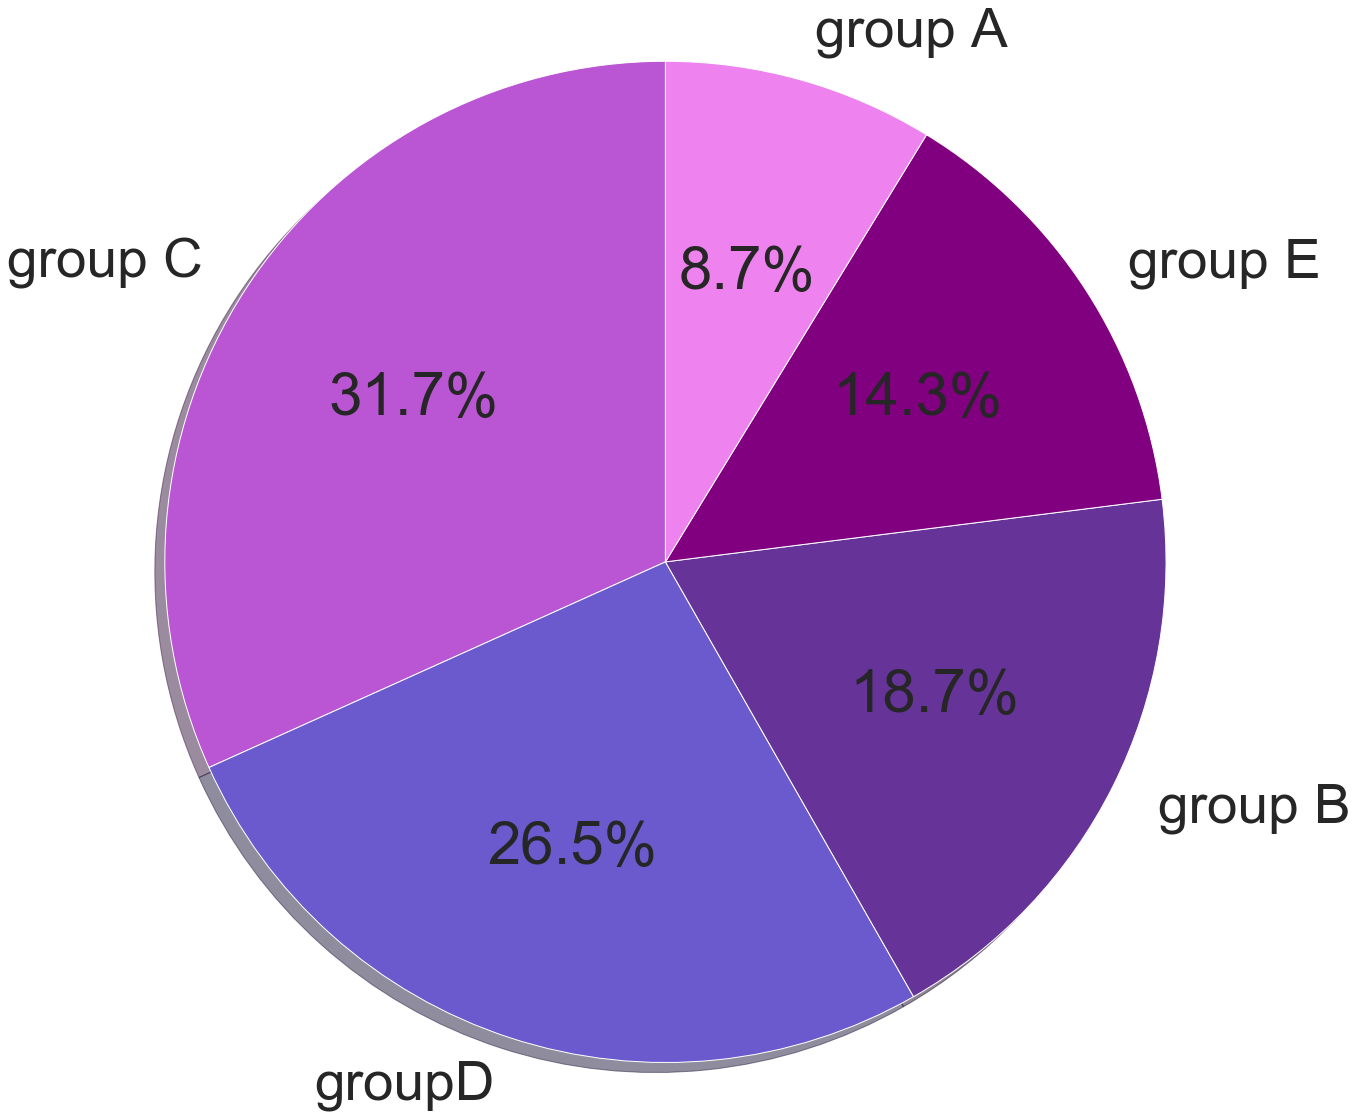

In [14]:
l=['group C','groupD','group B','group E','group A']
c=['mediumorchid','slateblue','rebeccapurple','purple','violet']
s=[sp[sp['Three_Pass']=='Yes']['race/ethnicity'].value_counts()[0],
   sp[sp['Three_Pass']=='Yes']['race/ethnicity'].value_counts()[1],
   sp[sp['Three_Pass']=='Yes']['race/ethnicity'].value_counts()[2],
   sp[sp['Three_Pass']=='Yes']['race/ethnicity'].value_counts()[3],
   sp[sp['Three_Pass']=='Yes']['race/ethnicity'].value_counts()[4]]
fig,ax=plt.subplots(figsize=(20,20))
ax.pie(s,labels=l,autopct='%1.1f%%' ,startangle=90, shadow=True,colors=c)
plt.axis('equal')
plt.show()

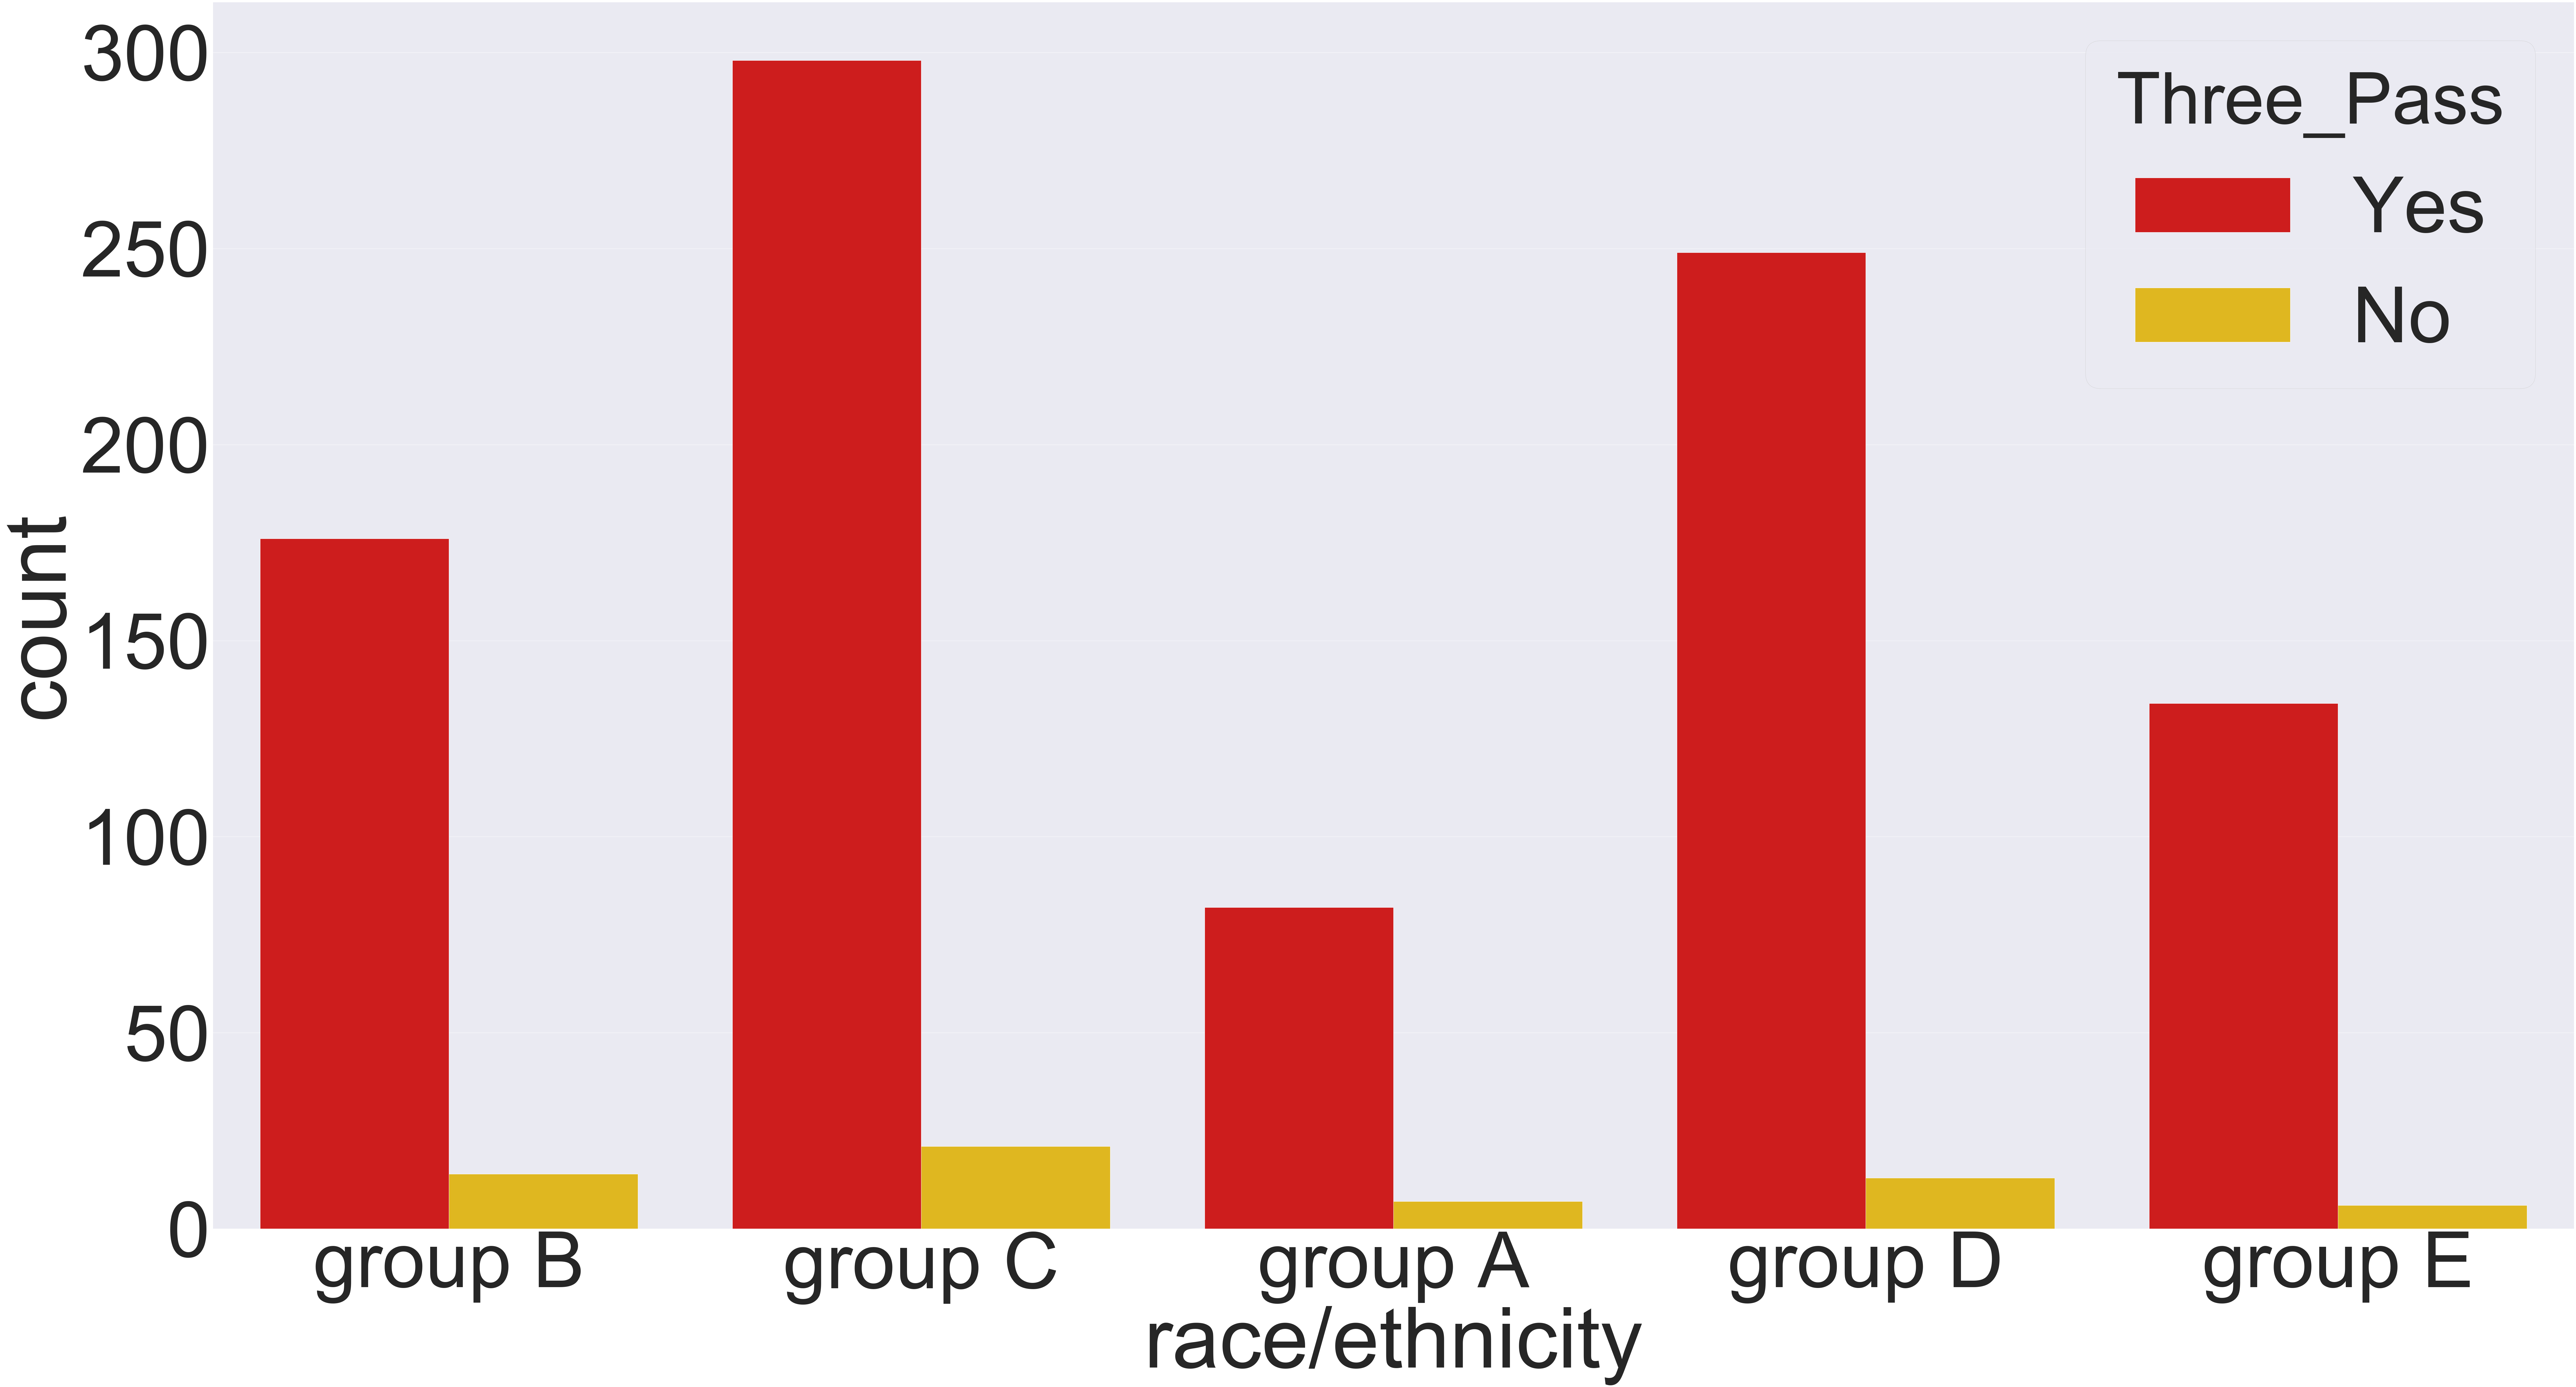

In [15]:
plt.rcParams['figure.figsize']=(150,80)
sns.set(font_scale=25)
sns.countplot(x="race/ethnicity", data=sp, hue="Three_Pass",palette='hot')
plt.show()

Group C and Group D students performed well and have greater pass percentage than the rest


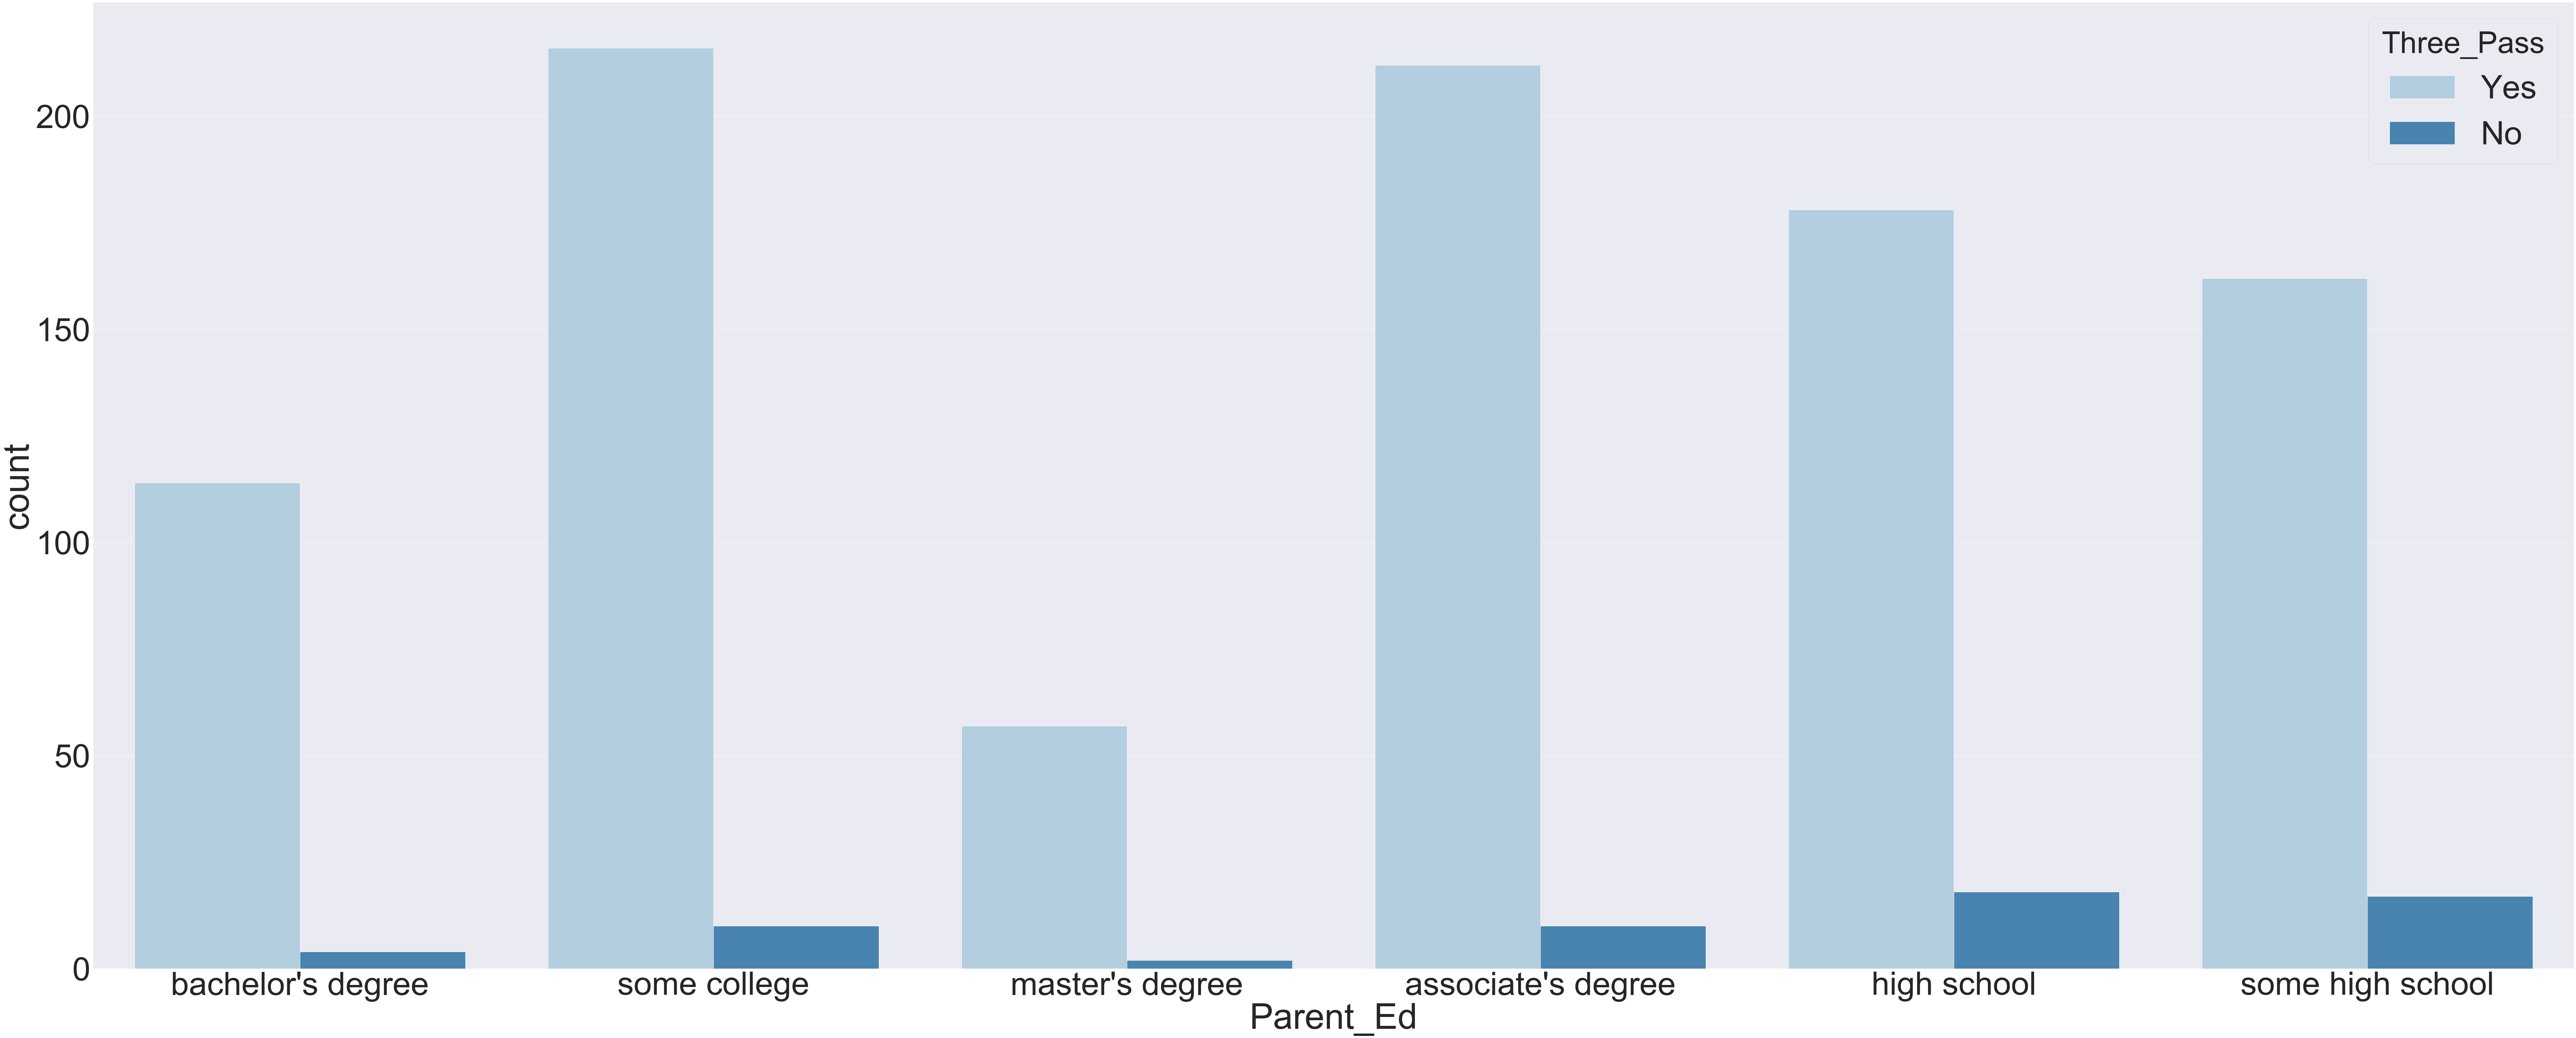

In [16]:
plt.rcParams['figure.figsize']=(150,60)
sns.set(font_scale=10)
sns.countplot(x="Parent_Ed", data=sp, hue="Three_Pass",palette='Blues')
plt.show()

Students of parents who have done only uptil high school level of education have higher rates of failing when compared to students of parents who have studied beyond that.

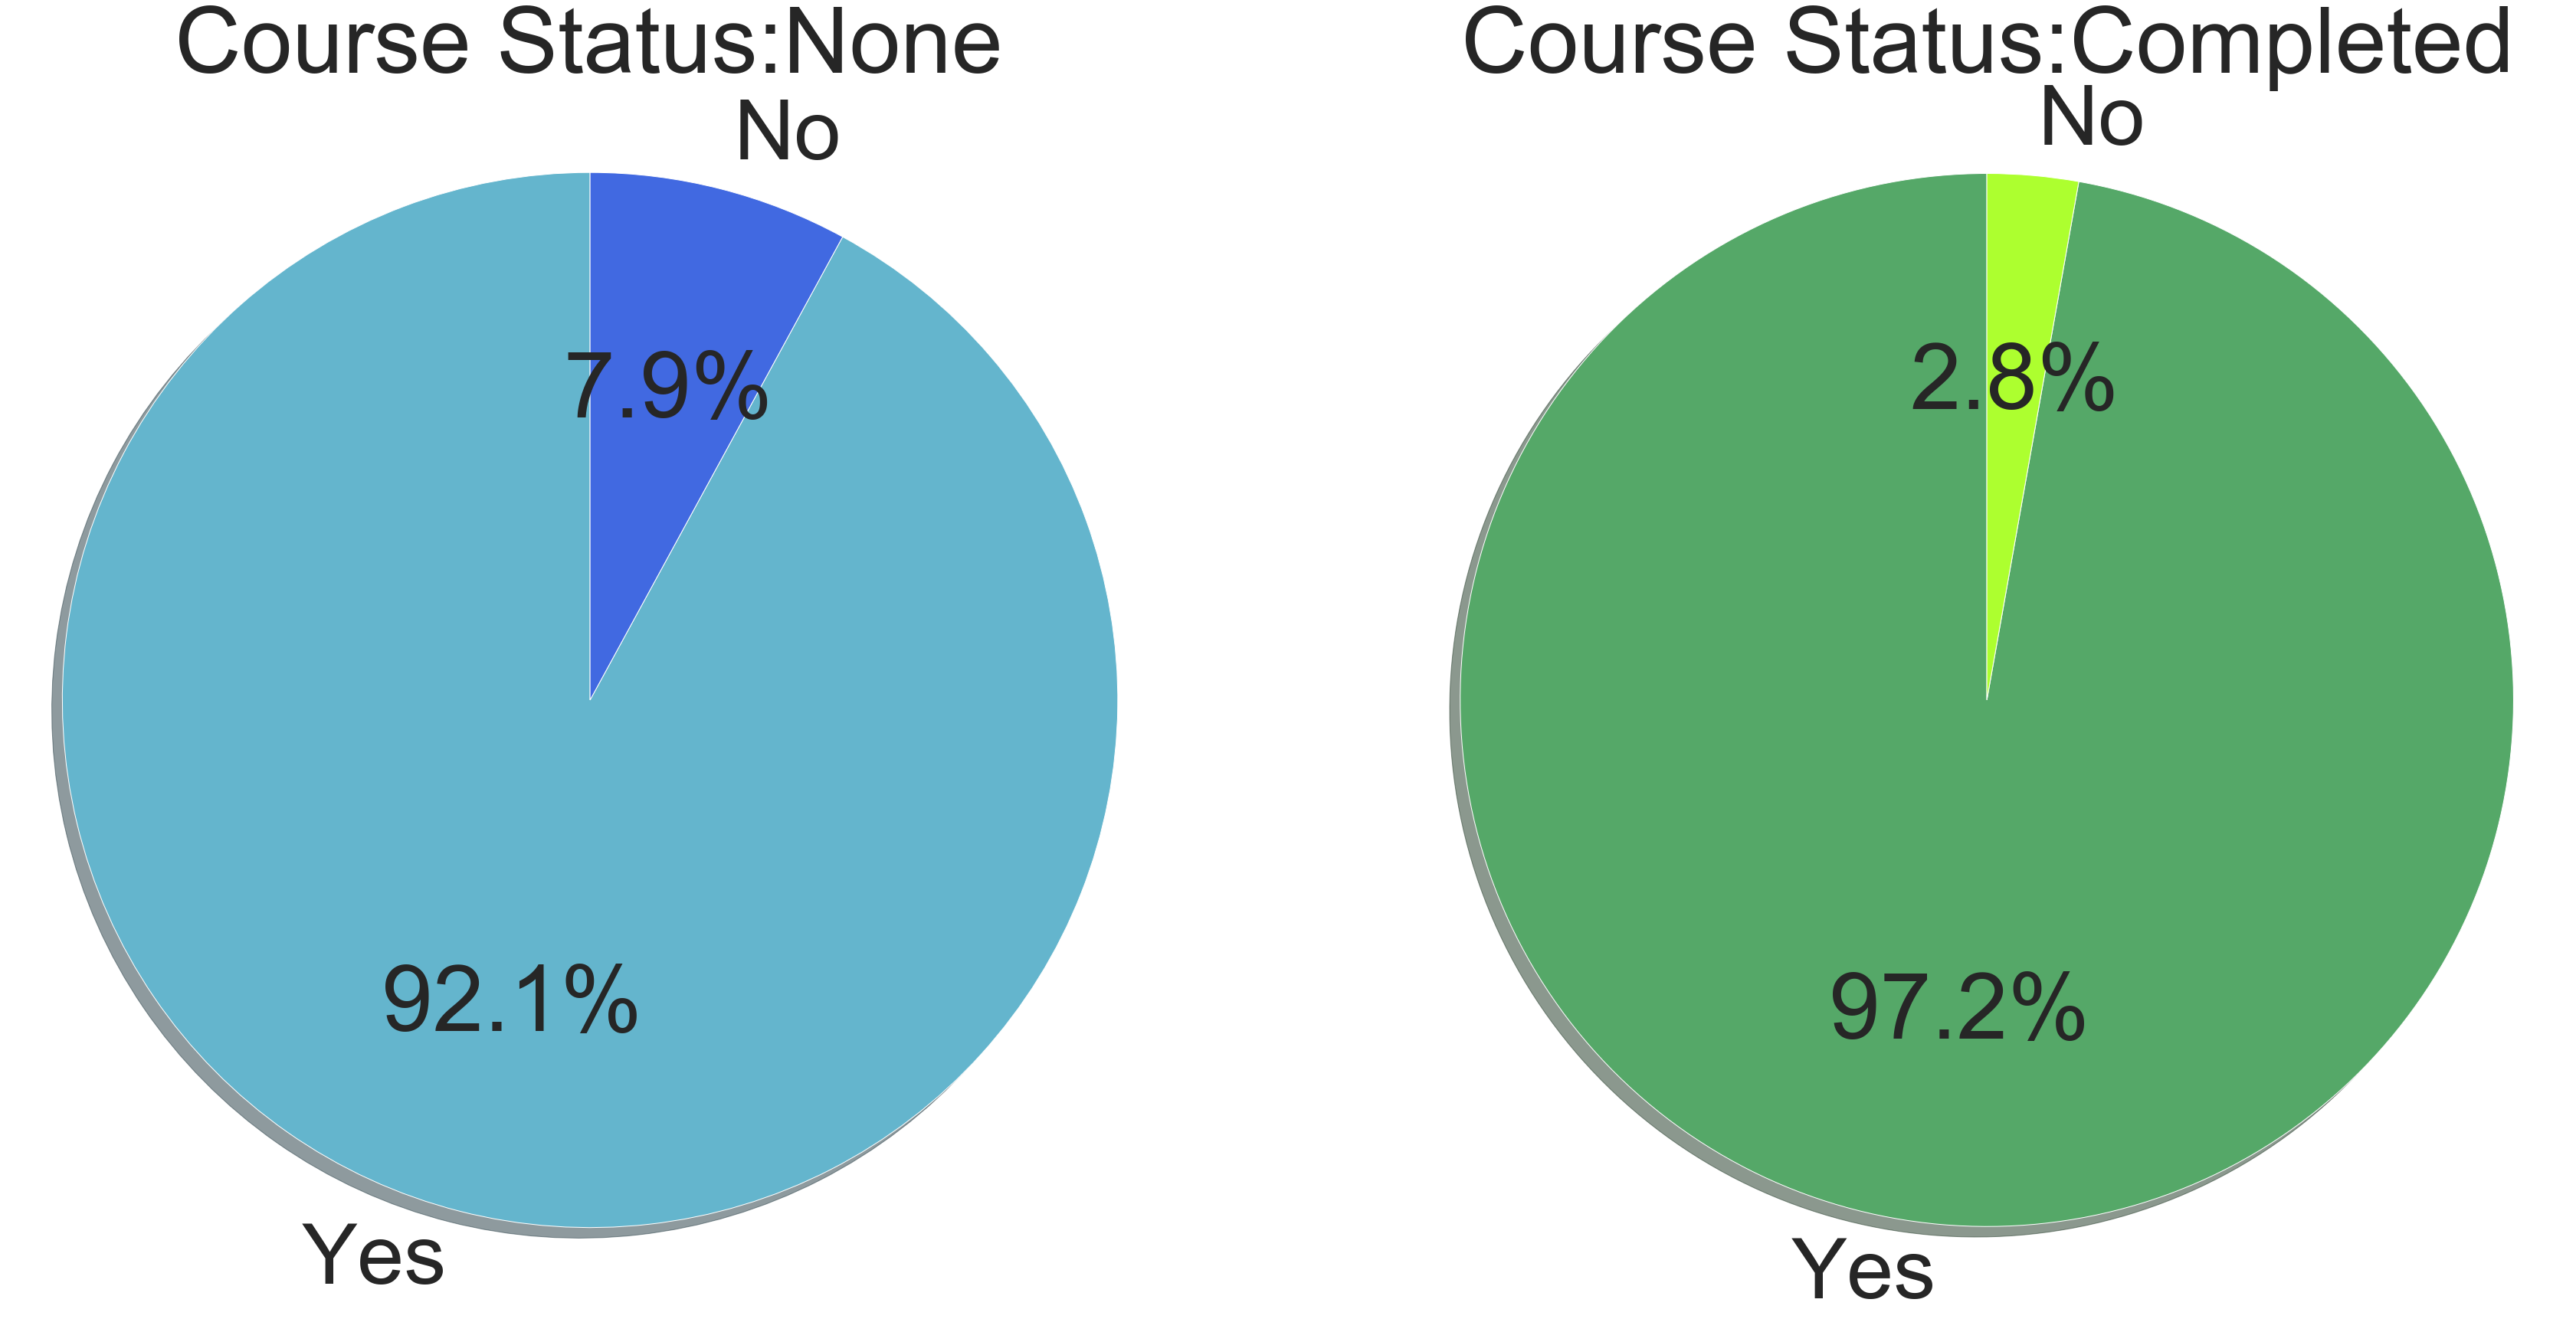

In [17]:
c1=['c','royalblue']
c2=['g','greenyellow']
sns.set(font_scale=10)
fig=plt.figure(figsize=(60,30))
a1=fig.add_subplot(1,2,1)
a2=fig.add_subplot(1,2,2)
a1.pie(sp[sp["Course_Status"]=='none']["Three_Pass"].value_counts(), 
       labels=['Yes','No'],autopct='%1.1f%%', shadow=True, startangle=90,colors=c1)
a2.pie(sp[sp["Course_Status"]=='completed']["Three_Pass"].value_counts(), 
       labels=['Yes','No'],autopct='%1.1f%%', shadow=True, startangle=90,colors=c2)
a1.axis('equal')
a1.set_title("Course Status:None")
a2.set_title("Course Status:Completed")
a2.axis('equal')
plt.show()


Students who have completed the course have a higher pass percentage in all three subjects than thos who haven't.

# Conclusion

Students who perform better in terms of

Gender: Female but the difference is only 2.4%

Race/Ethnicity: Group C and D

Parental Education: Above High school level 

Lunch: Standard

Course Status: Completed

# Proportion of each columns

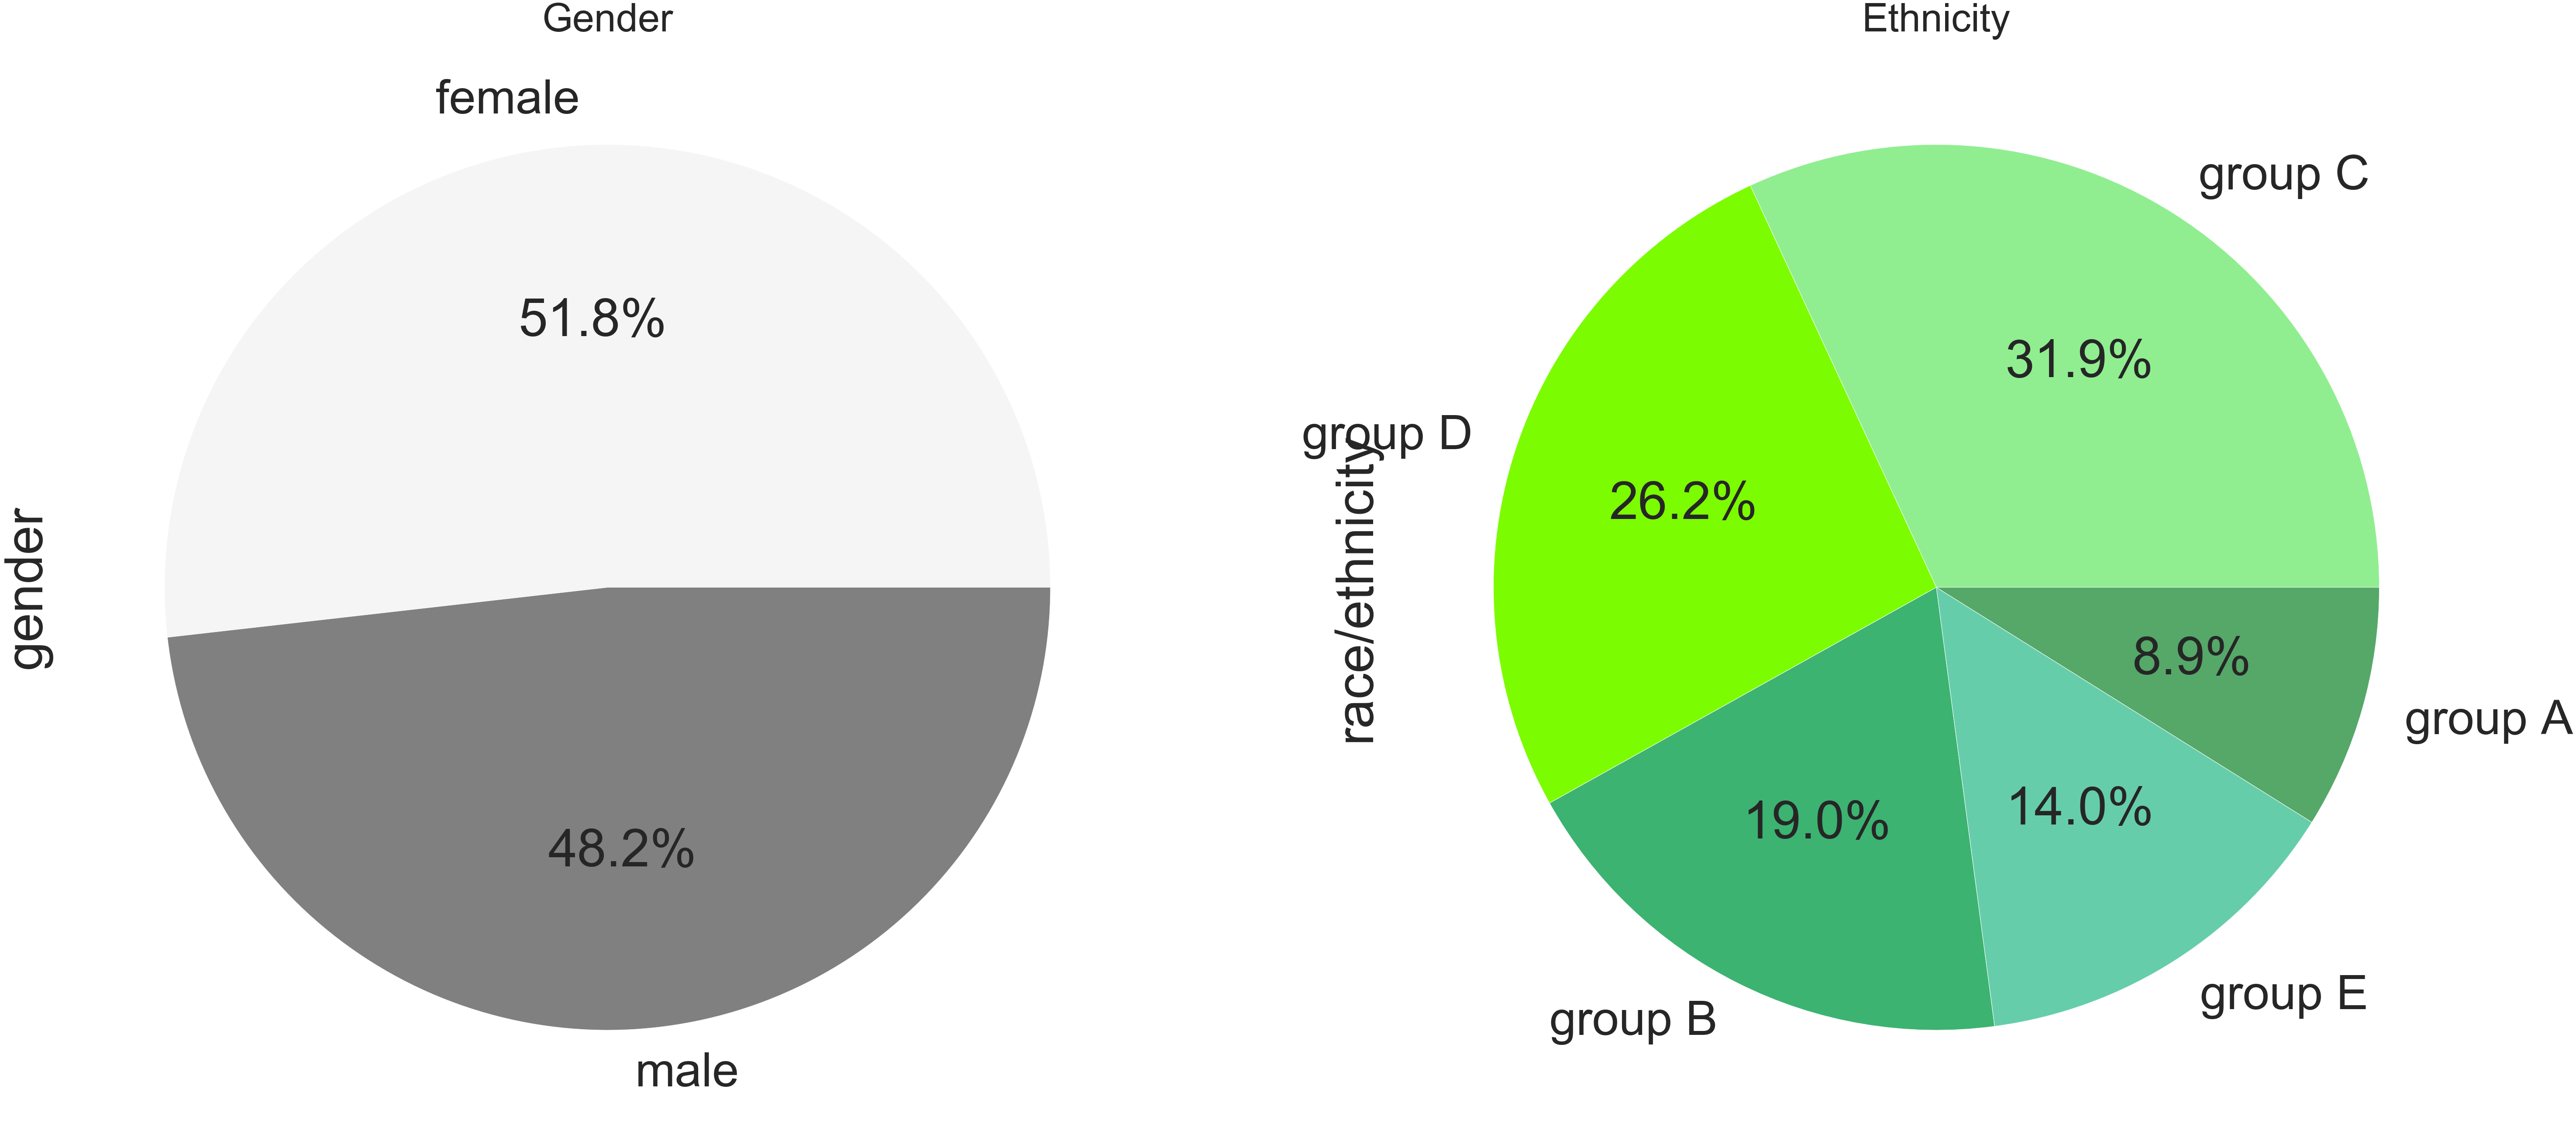

In [18]:
c1=['whitesmoke','grey']
c2=['lightgreen','lawngreen','mediumseagreen','mediumaquamarine','g']
sns.set(font_scale=10)
plt.figure(figsize=(100,100))
plt.subplot(121)
plt.title('Gender',fontsize= 90)
sp['gender'].value_counts().plot(kind='pie',autopct='%1.1f%%',colors=c1)

plt.subplot(122)
plt.title('Ethnicity',fontsize= 90)
sp['race/ethnicity'].value_counts().plot(kind='pie',autopct='%1.1f%%',colors=c2)
plt.show()


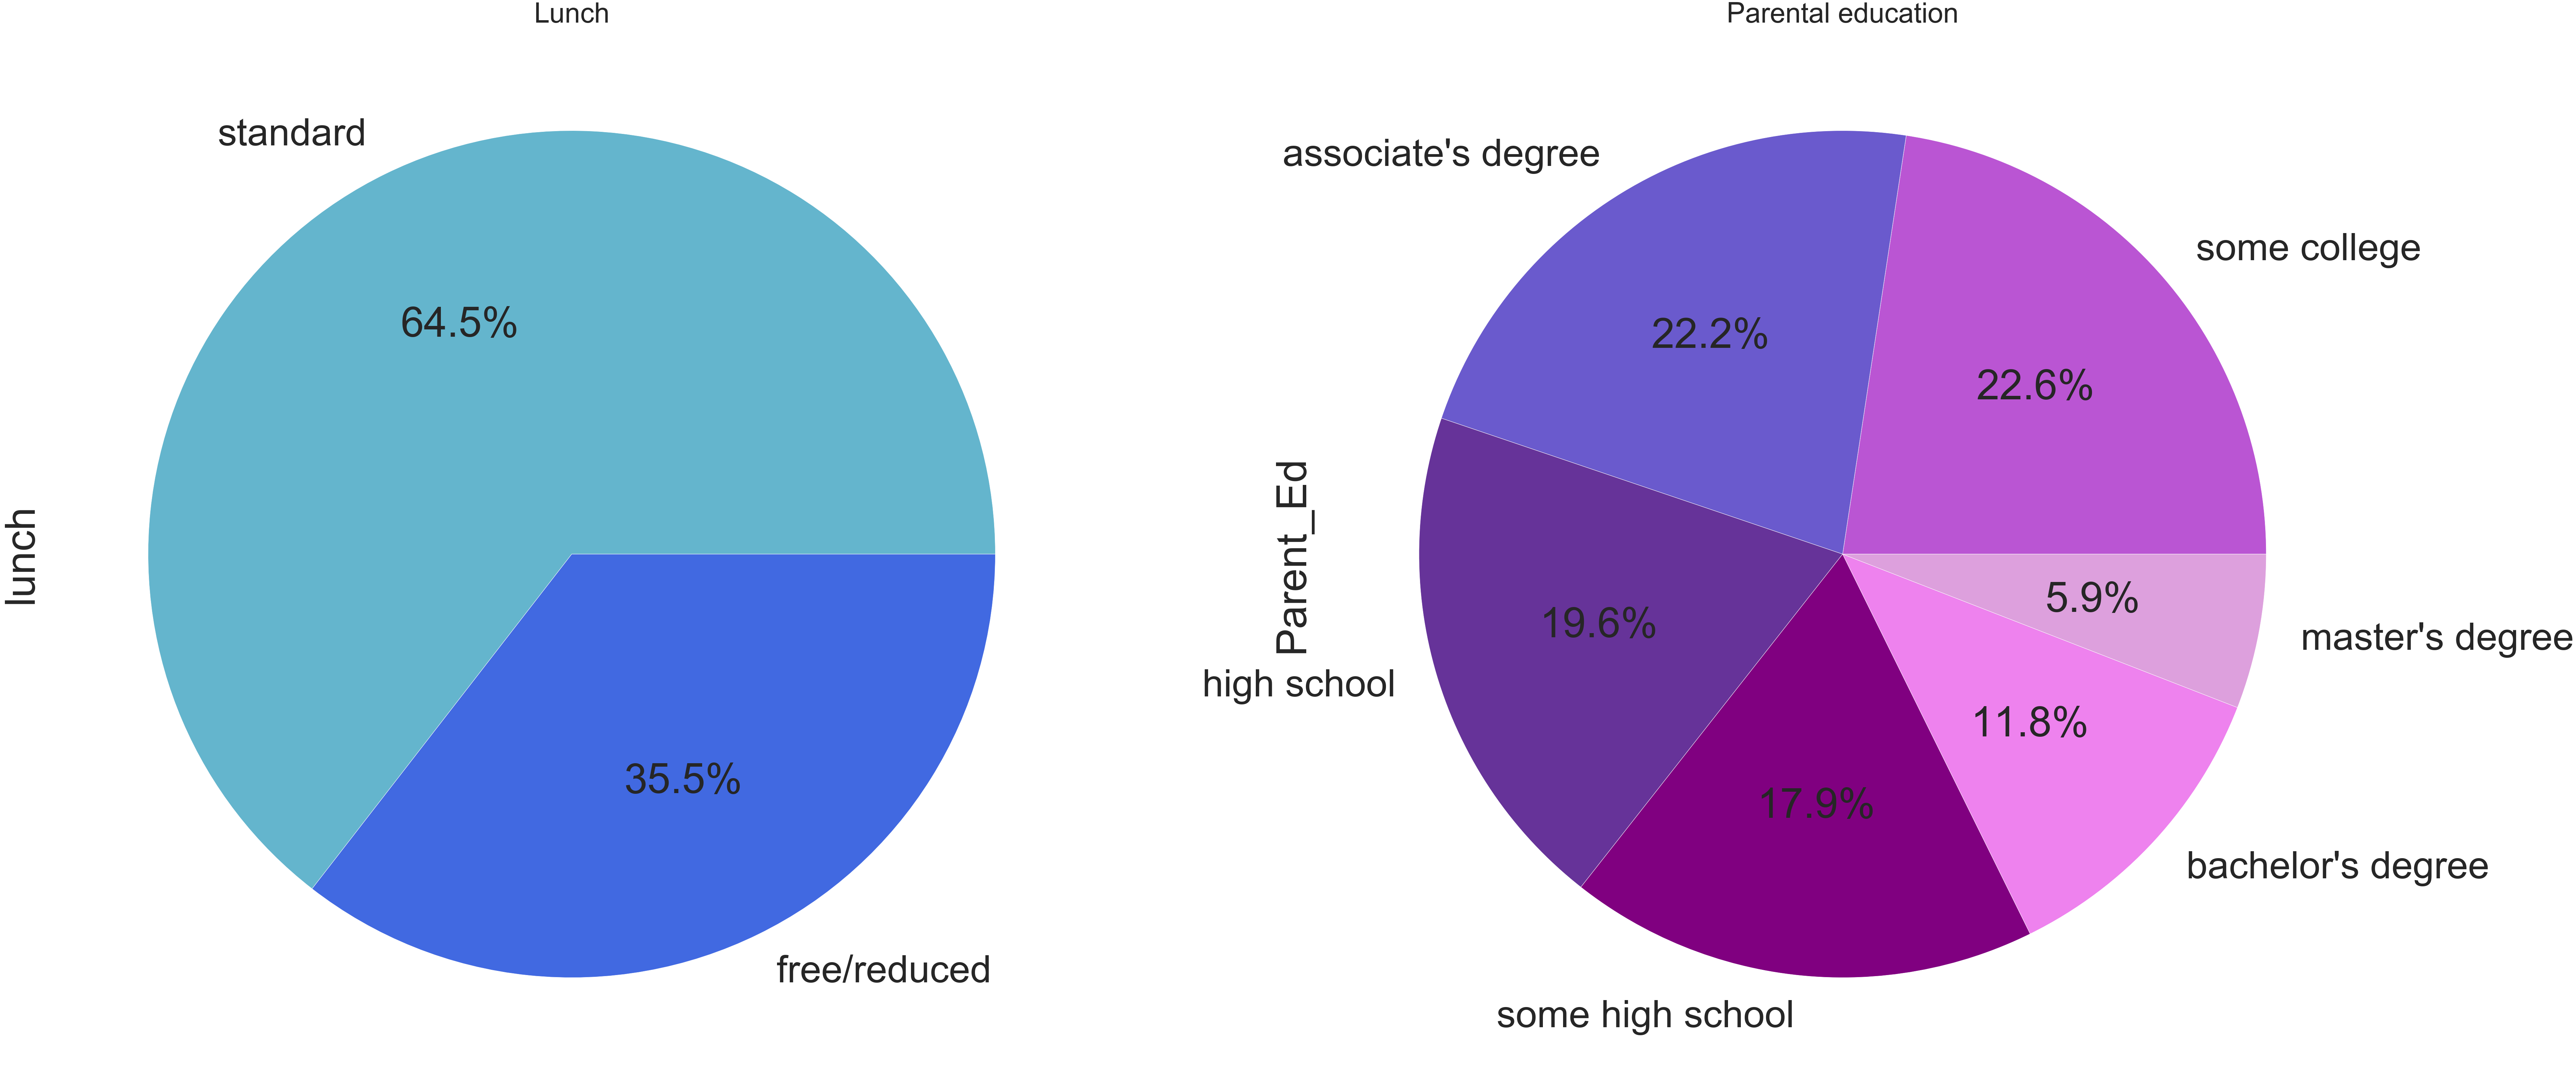

In [19]:
c1=['c','royalblue']
c2=['mediumorchid','slateblue','rebeccapurple','purple','violet','plum']
plt.figure(figsize=(120,100))
plt.subplot(121)
plt.title('Lunch',fontsize= 80)
sp['lunch'].value_counts().plot(kind='pie',autopct='%1.1f%%',colors=c1)

plt.subplot(122)
plt.title('Parental education',fontsize= 80)
sp['Parent_Ed'].value_counts().plot(kind='pie',autopct='%1.1f%%',colors=c2)
plt.show()

# Gender vs individual subject scores

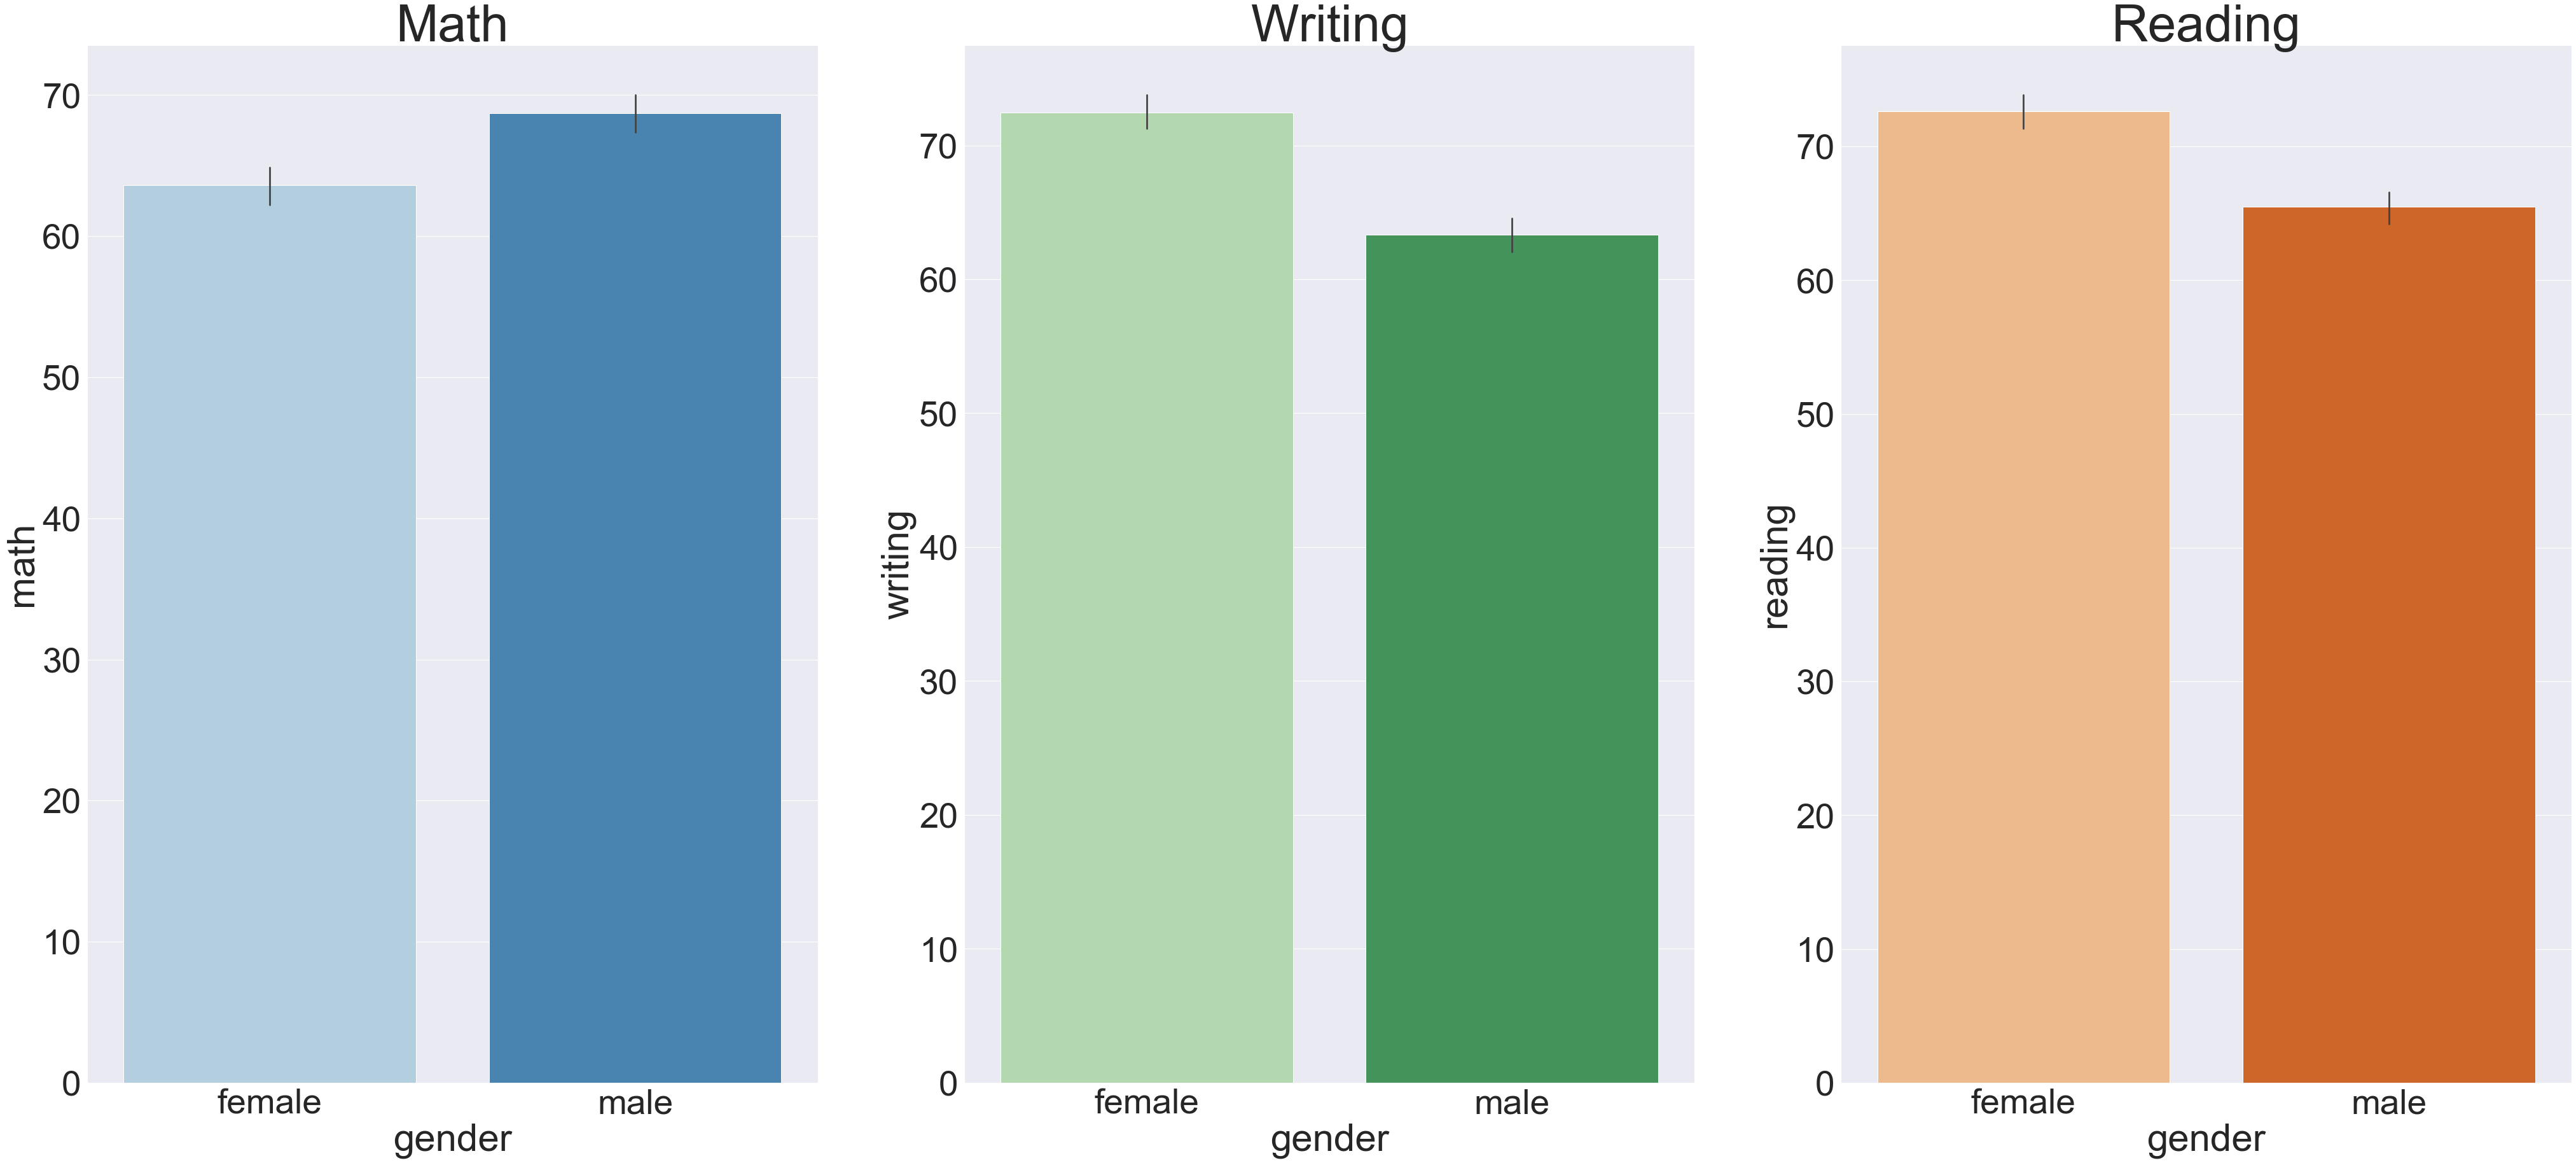

In [20]:
plt.figure(figsize=(70,30))
sns.set(font_scale=5)
plt.subplot(131)
plt.title("Math",fontsize=80)
sns.barplot(x='gender',y='math',data=sp,palette='Blues')

plt.subplot(132)
plt.title("Writing",fontsize=80)
sns.barplot(x='gender',y='writing',data=sp,palette='Greens')

plt.subplot(133)
plt.title("Reading",fontsize=80)
sns.barplot(x='gender',y='reading',data=sp,palette='Oranges')
plt.show()

Male students have performed well in math whereas female students have done well writing and reading.

# Race/Ethinicity vs individual subject scores

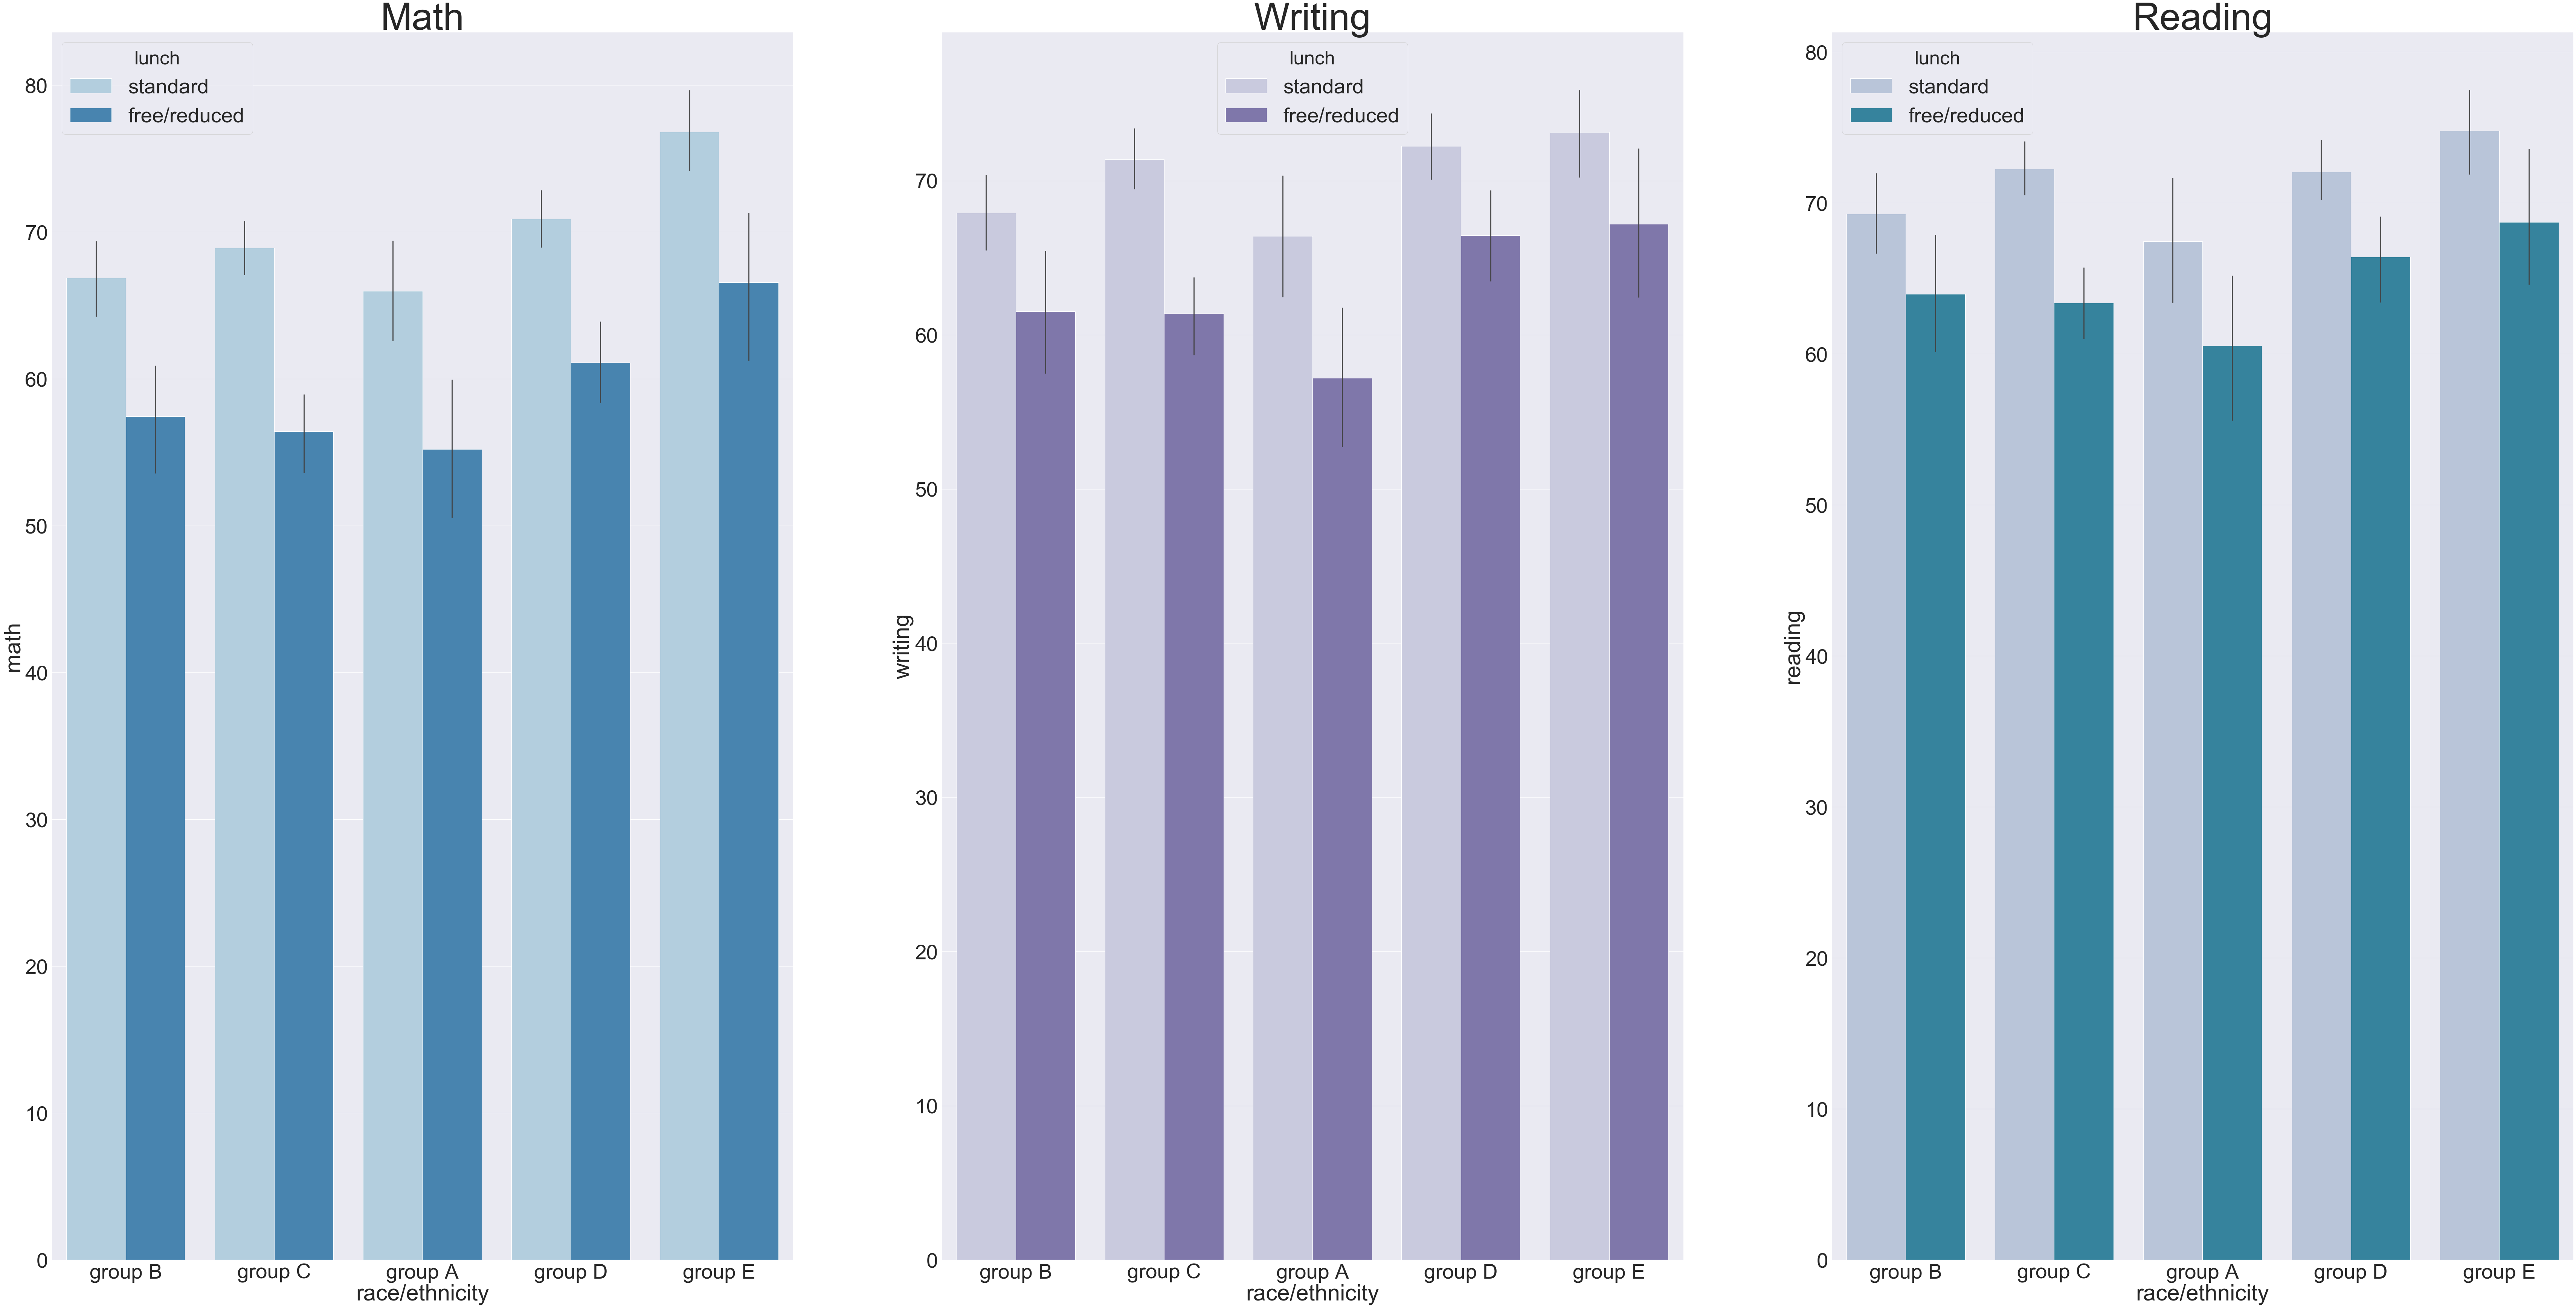

In [21]:
plt.figure(figsize=(120,60))
sns.set(font_scale=5)
plt.subplot(131)
plt.title("Math",fontsize=100)
sns.barplot(x='race/ethnicity',y='math',hue='lunch',data=sp,palette='Blues')
plt.subplot(132)
plt.title("Writing",fontsize=100)
sns.barplot(x='race/ethnicity',y='writing',hue='lunch',data=sp,palette='Purples')
plt.subplot(133)
plt.title("Reading",fontsize=100)
sns.barplot(x='race/ethnicity',y='reading',hue='lunch',data=sp,palette='PuBuGn')
plt.show()

# Course Status comparison with rest variables


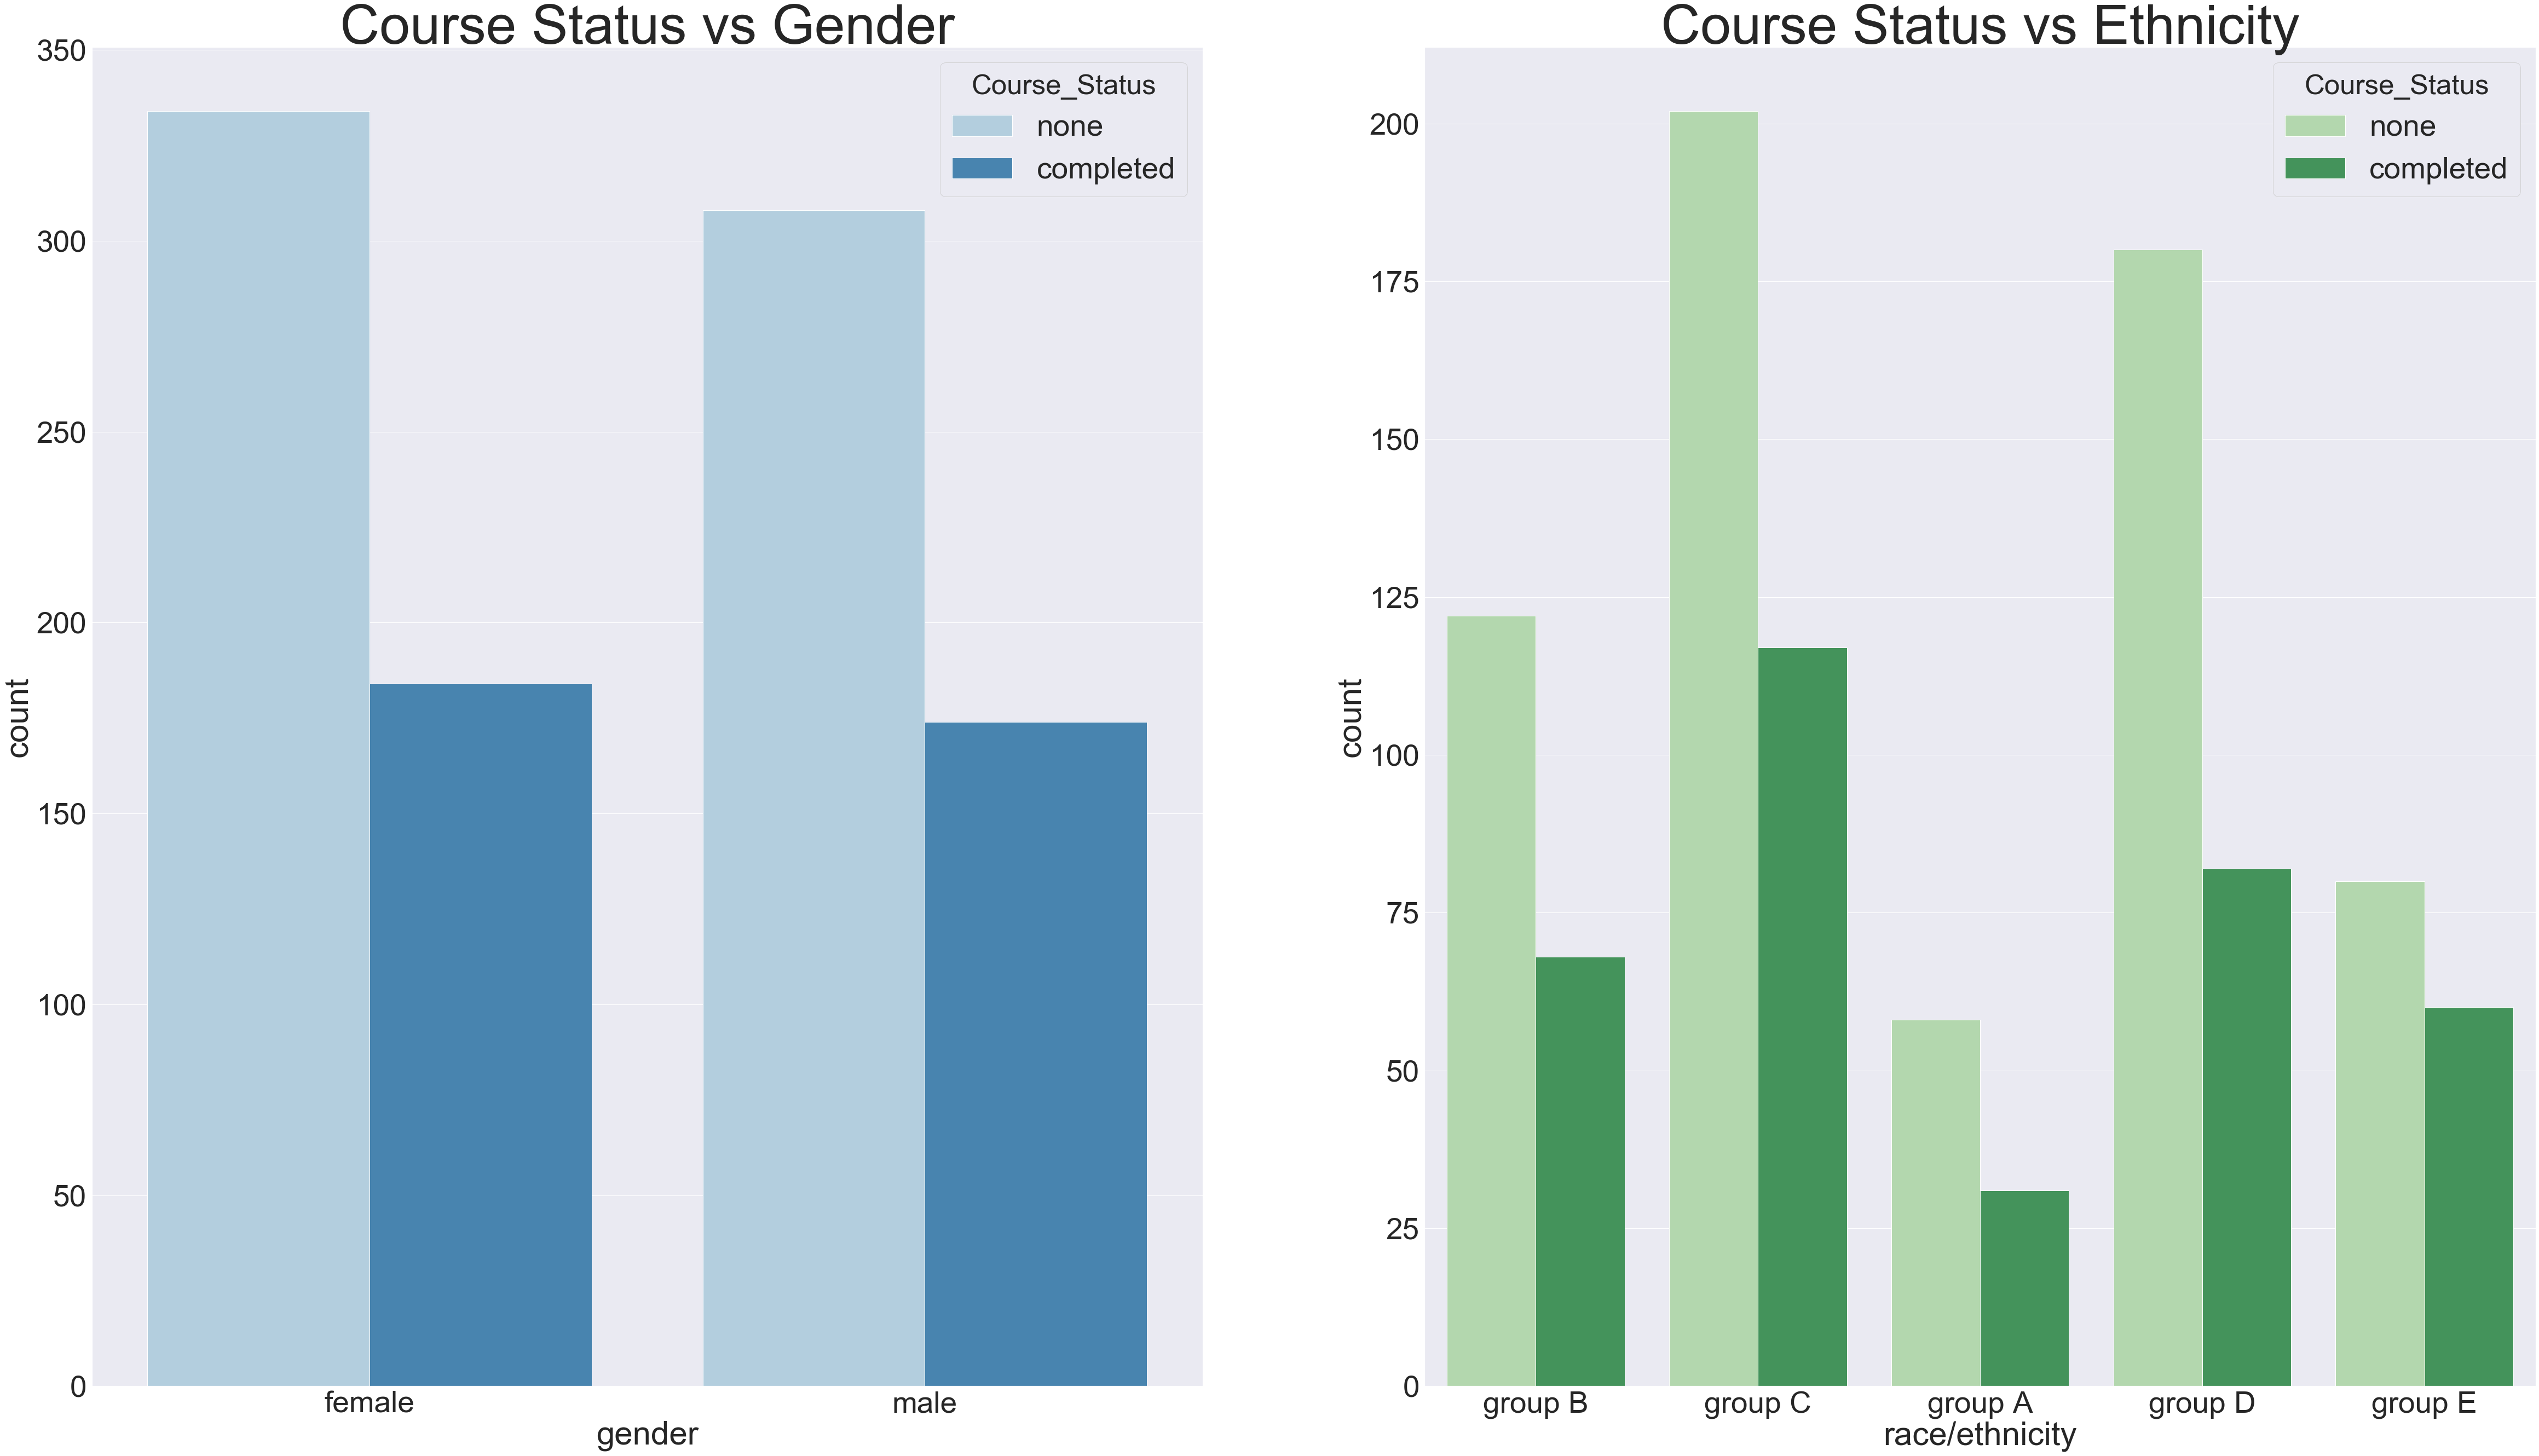

In [22]:
plt.figure(figsize=(80,45))
plt.subplot(121)
plt.title("Course Status vs Gender",fontsize=100)
sns.countplot(x='gender',hue='Course_Status',data=sp,palette='Blues')
plt.subplot(122)
plt.title("Course Status vs Ethnicity",fontsize=100)
sns.countplot(x='race/ethnicity',hue='Course_Status',data=sp,palette='Greens')
plt.show()

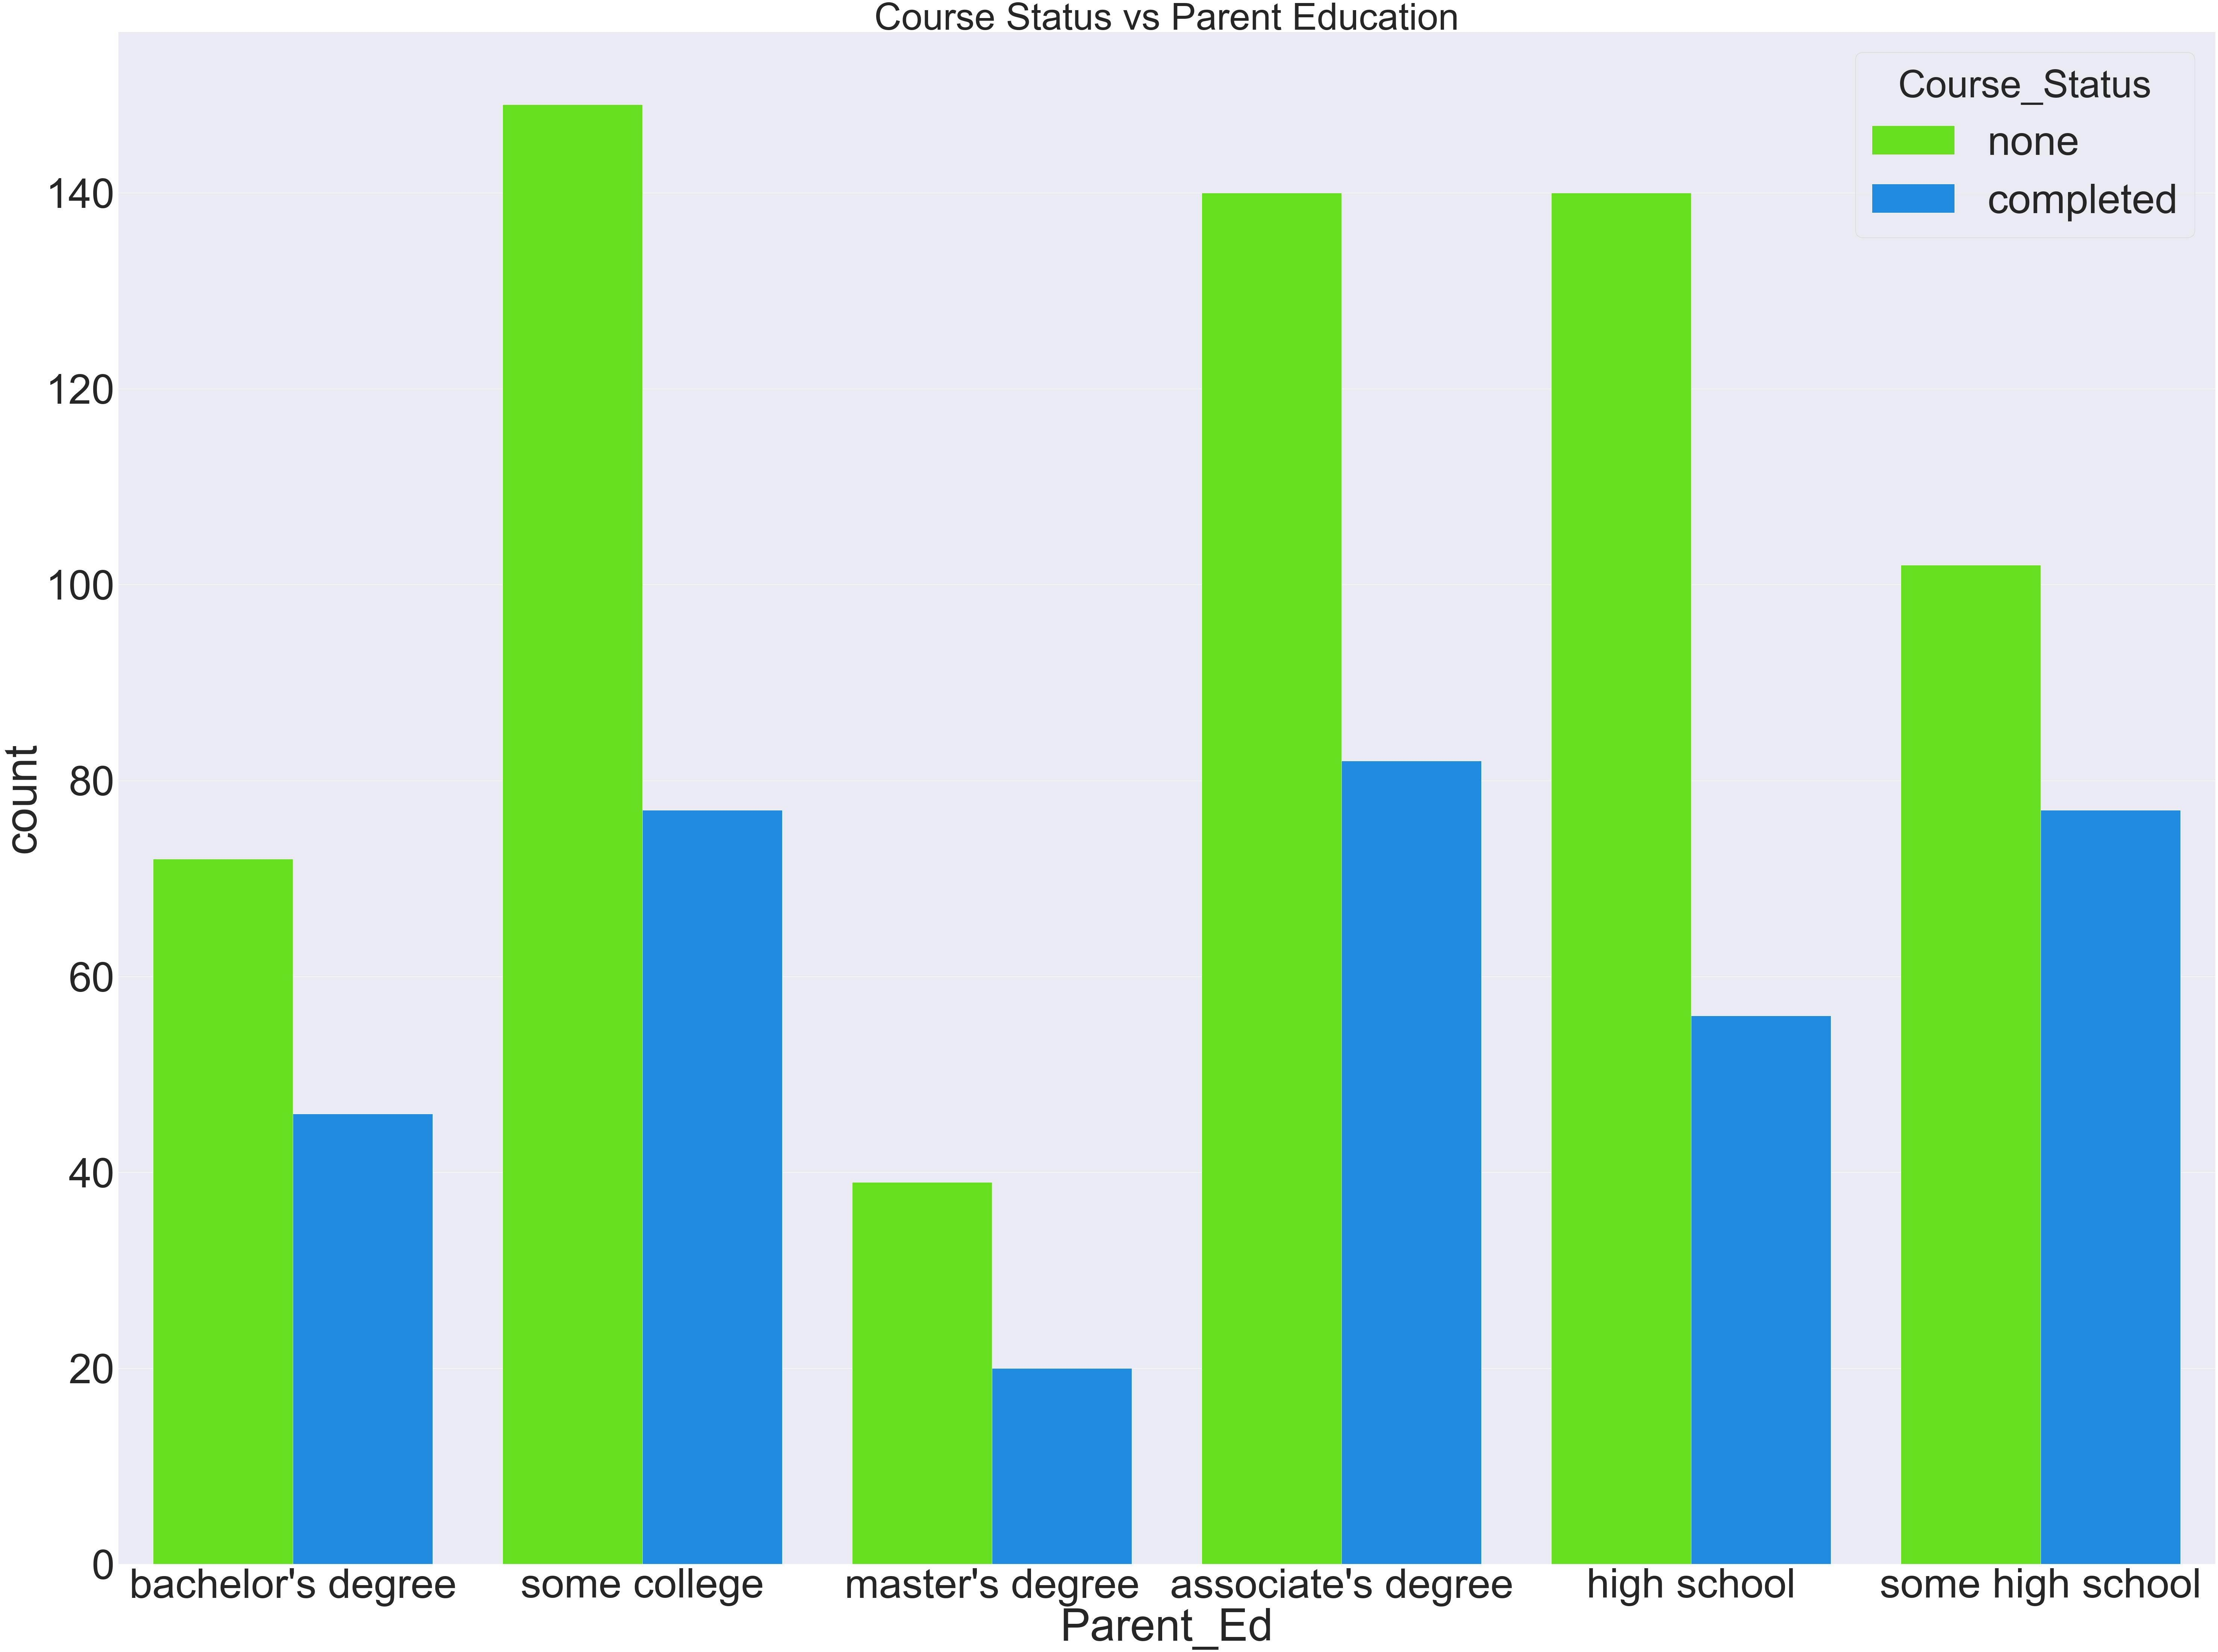

In [23]:
plt.figure(figsize=(100,75))
sns.set(font_scale=10)
plt.title("Course Status vs Parent Education",fontsize=100)
sns.countplot(x='Parent_Ed',hue='Course_Status',data=sp,palette='gist_rainbow')
plt.show()


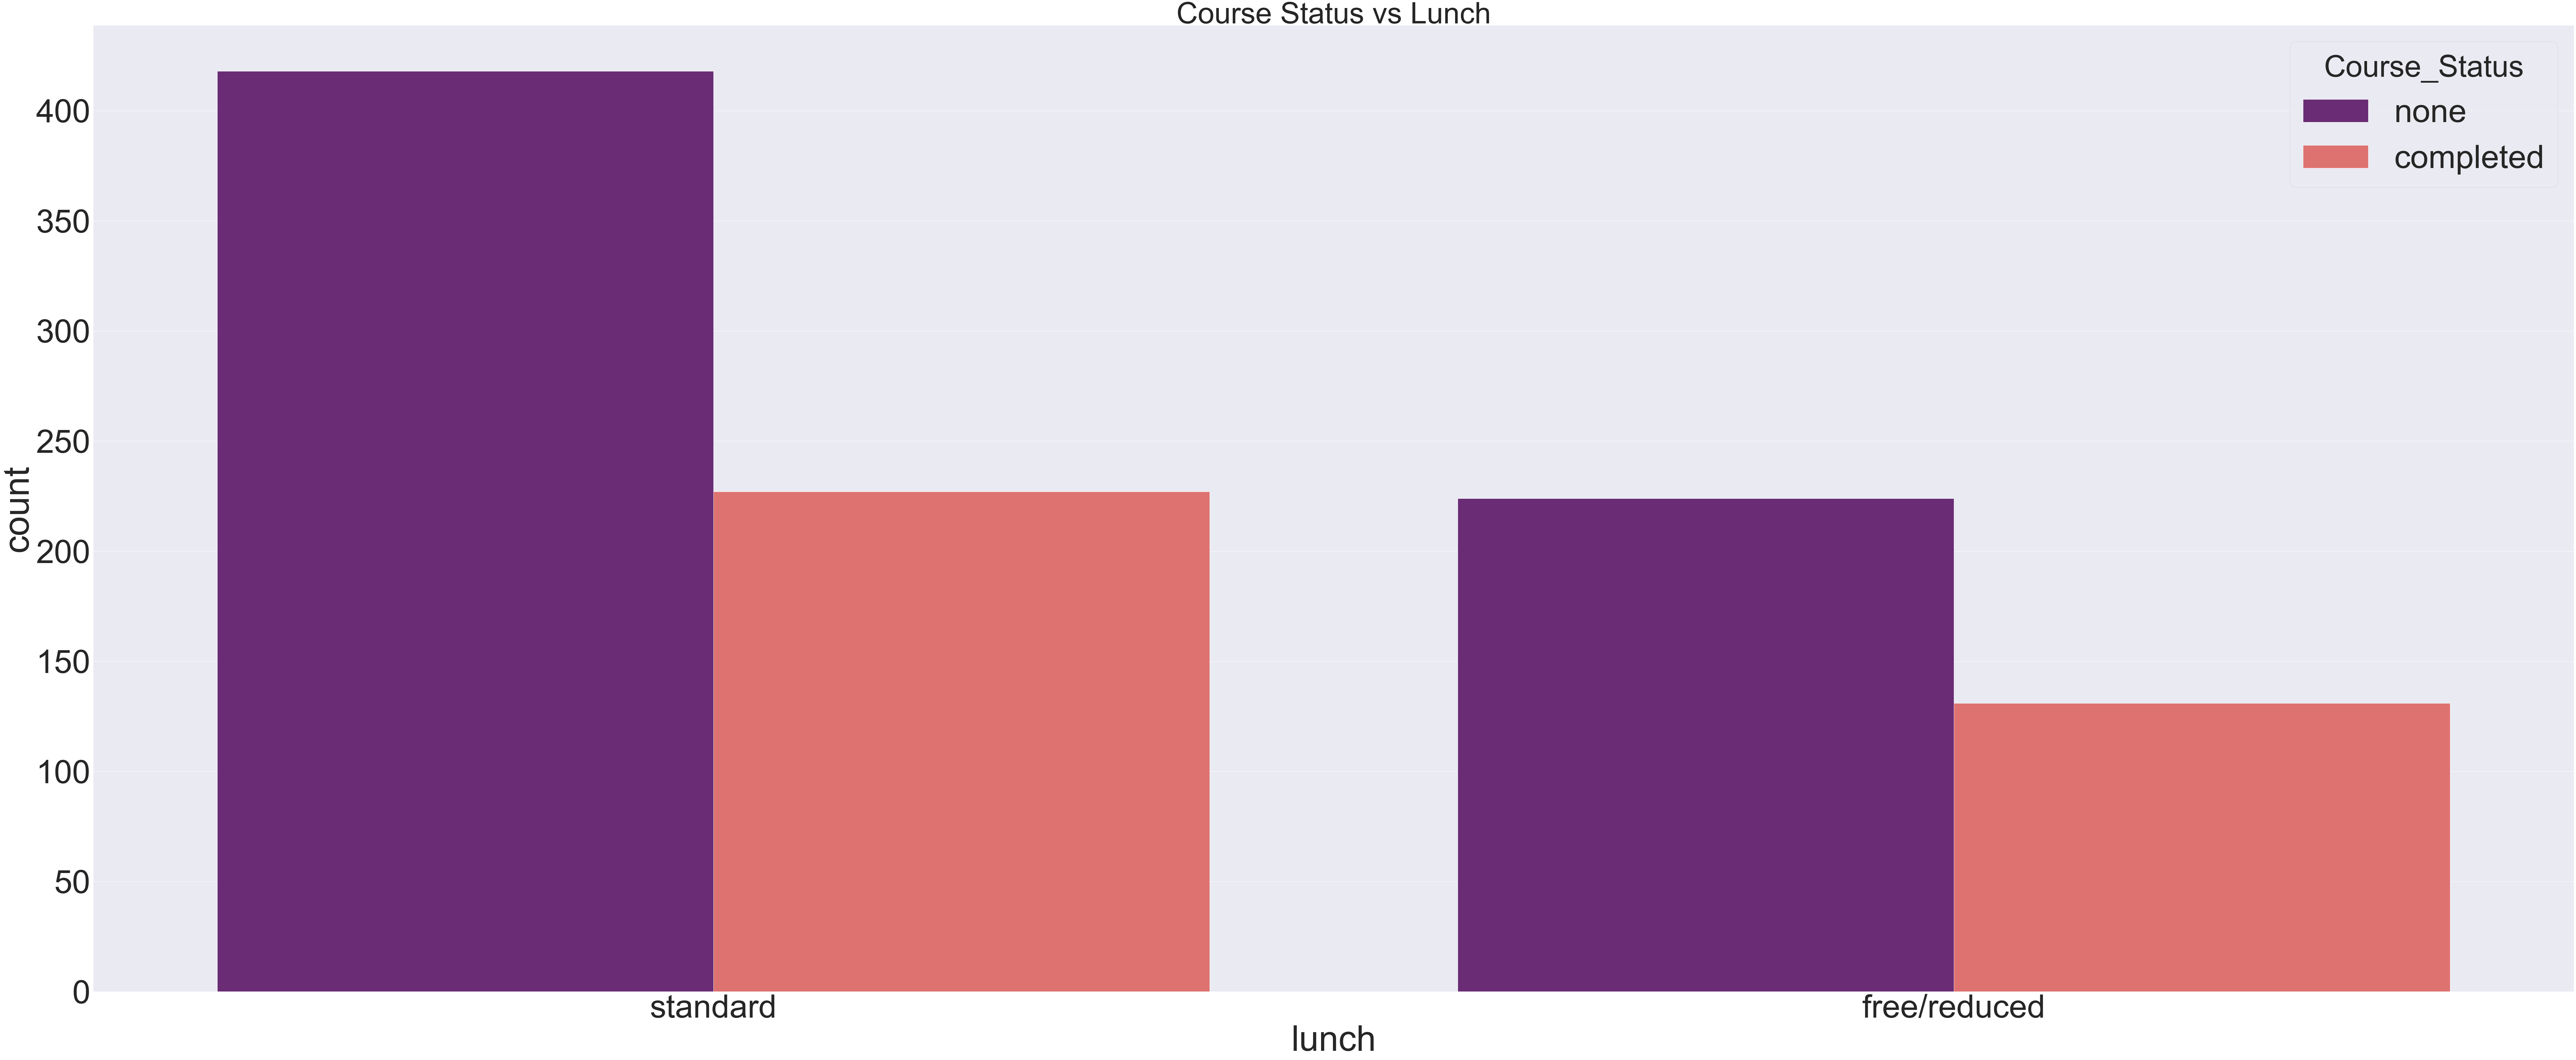

In [24]:
plt.title("Course Status vs Lunch",fontsize=100)
sns.countplot(x='lunch',hue='Course_Status',data=sp,palette='magma')
plt.show()

## Most Students have not completed the course


## The ones who have completed the course:
*Students who belong to Group C 

*Students who receive standard meal

*Students whose parents have education above high school level 

In [25]:
plt.figure(figsize=(250,100))
plt.subplot(121)
plt.title("Parent Education vs Gender",fontsize=100)
sns.countplot(x='gender',hue='Parent_Ed',data=sp,palette='deep')
plt.subplot(122)
plt.title("Parent Education vs Lunch",fontsize=100)
sns.countplot(x='lunch',hue='Parent_Ed',data=sp,palette='pastel')
plt.show()

## Grades
88-100: A

76-87:  B

64-75:  C

52-63:  D

40-51:  E

0-39 :  F


In [26]:
sp['Total']=(sp['math']+sp['reading']+sp['writing'])/3
sp.head()

gender race/ethnicity           Parent_Ed         lunch Course_Status  \
0  female        group B   bachelor's degree      standard          none   
1  female        group C        some college      standard     completed   
2  female        group B     master's degree      standard          none   
3    male        group A  associate's degree  free/reduced          none   
4    male        group C        some college      standard          none   

   math  reading  writing P/F_Math P/F_Read P/F_Write Three_Pass      Total  
0    72       72       74     Pass     Pass      Pass        Yes  72.666667  
1    69       90       88     Pass     Pass      Pass        Yes  82.333333  
2    90       95       93     Pass     Pass      Pass        Yes  92.666667  
3    47       57       44     Pass     Pass      Pass        Yes  49.333333  
4    76       78       75     Pass     Pass      Pass        Yes  76.333333

In [27]:
def grades(Total):
    if Total>=88 and Total<=100:
        return 'A'
    elif Total>=76 and Total<88:
        return 'B'
    elif Total>=64 and Total<76:
        return 'C'
    elif Total>=52 and Total<64:
        return 'D'
    elif Total>=40 and Total<52:
        return 'E'
    else:
        return 'F'
sp['Grade']=sp['Total'].apply(grades)
sp.head()

gender race/ethnicity           Parent_Ed         lunch Course_Status  \
0  female        group B   bachelor's degree      standard          none   
1  female        group C        some college      standard     completed   
2  female        group B     master's degree      standard          none   
3    male        group A  associate's degree  free/reduced          none   
4    male        group C        some college      standard          none   

   math  reading  writing P/F_Math P/F_Read P/F_Write Three_Pass      Total  \
0    72       72       74     Pass     Pass      Pass        Yes  72.666667   
1    69       90       88     Pass     Pass      Pass        Yes  82.333333   
2    90       95       93     Pass     Pass      Pass        Yes  92.666667   
3    47       57       44     Pass     Pass      Pass        Yes  49.333333   
4    76       78       75     Pass     Pass      Pass        Yes  76.333333   

  Grade  
0     C  
1     B  
2     A  
3     E  
4     B

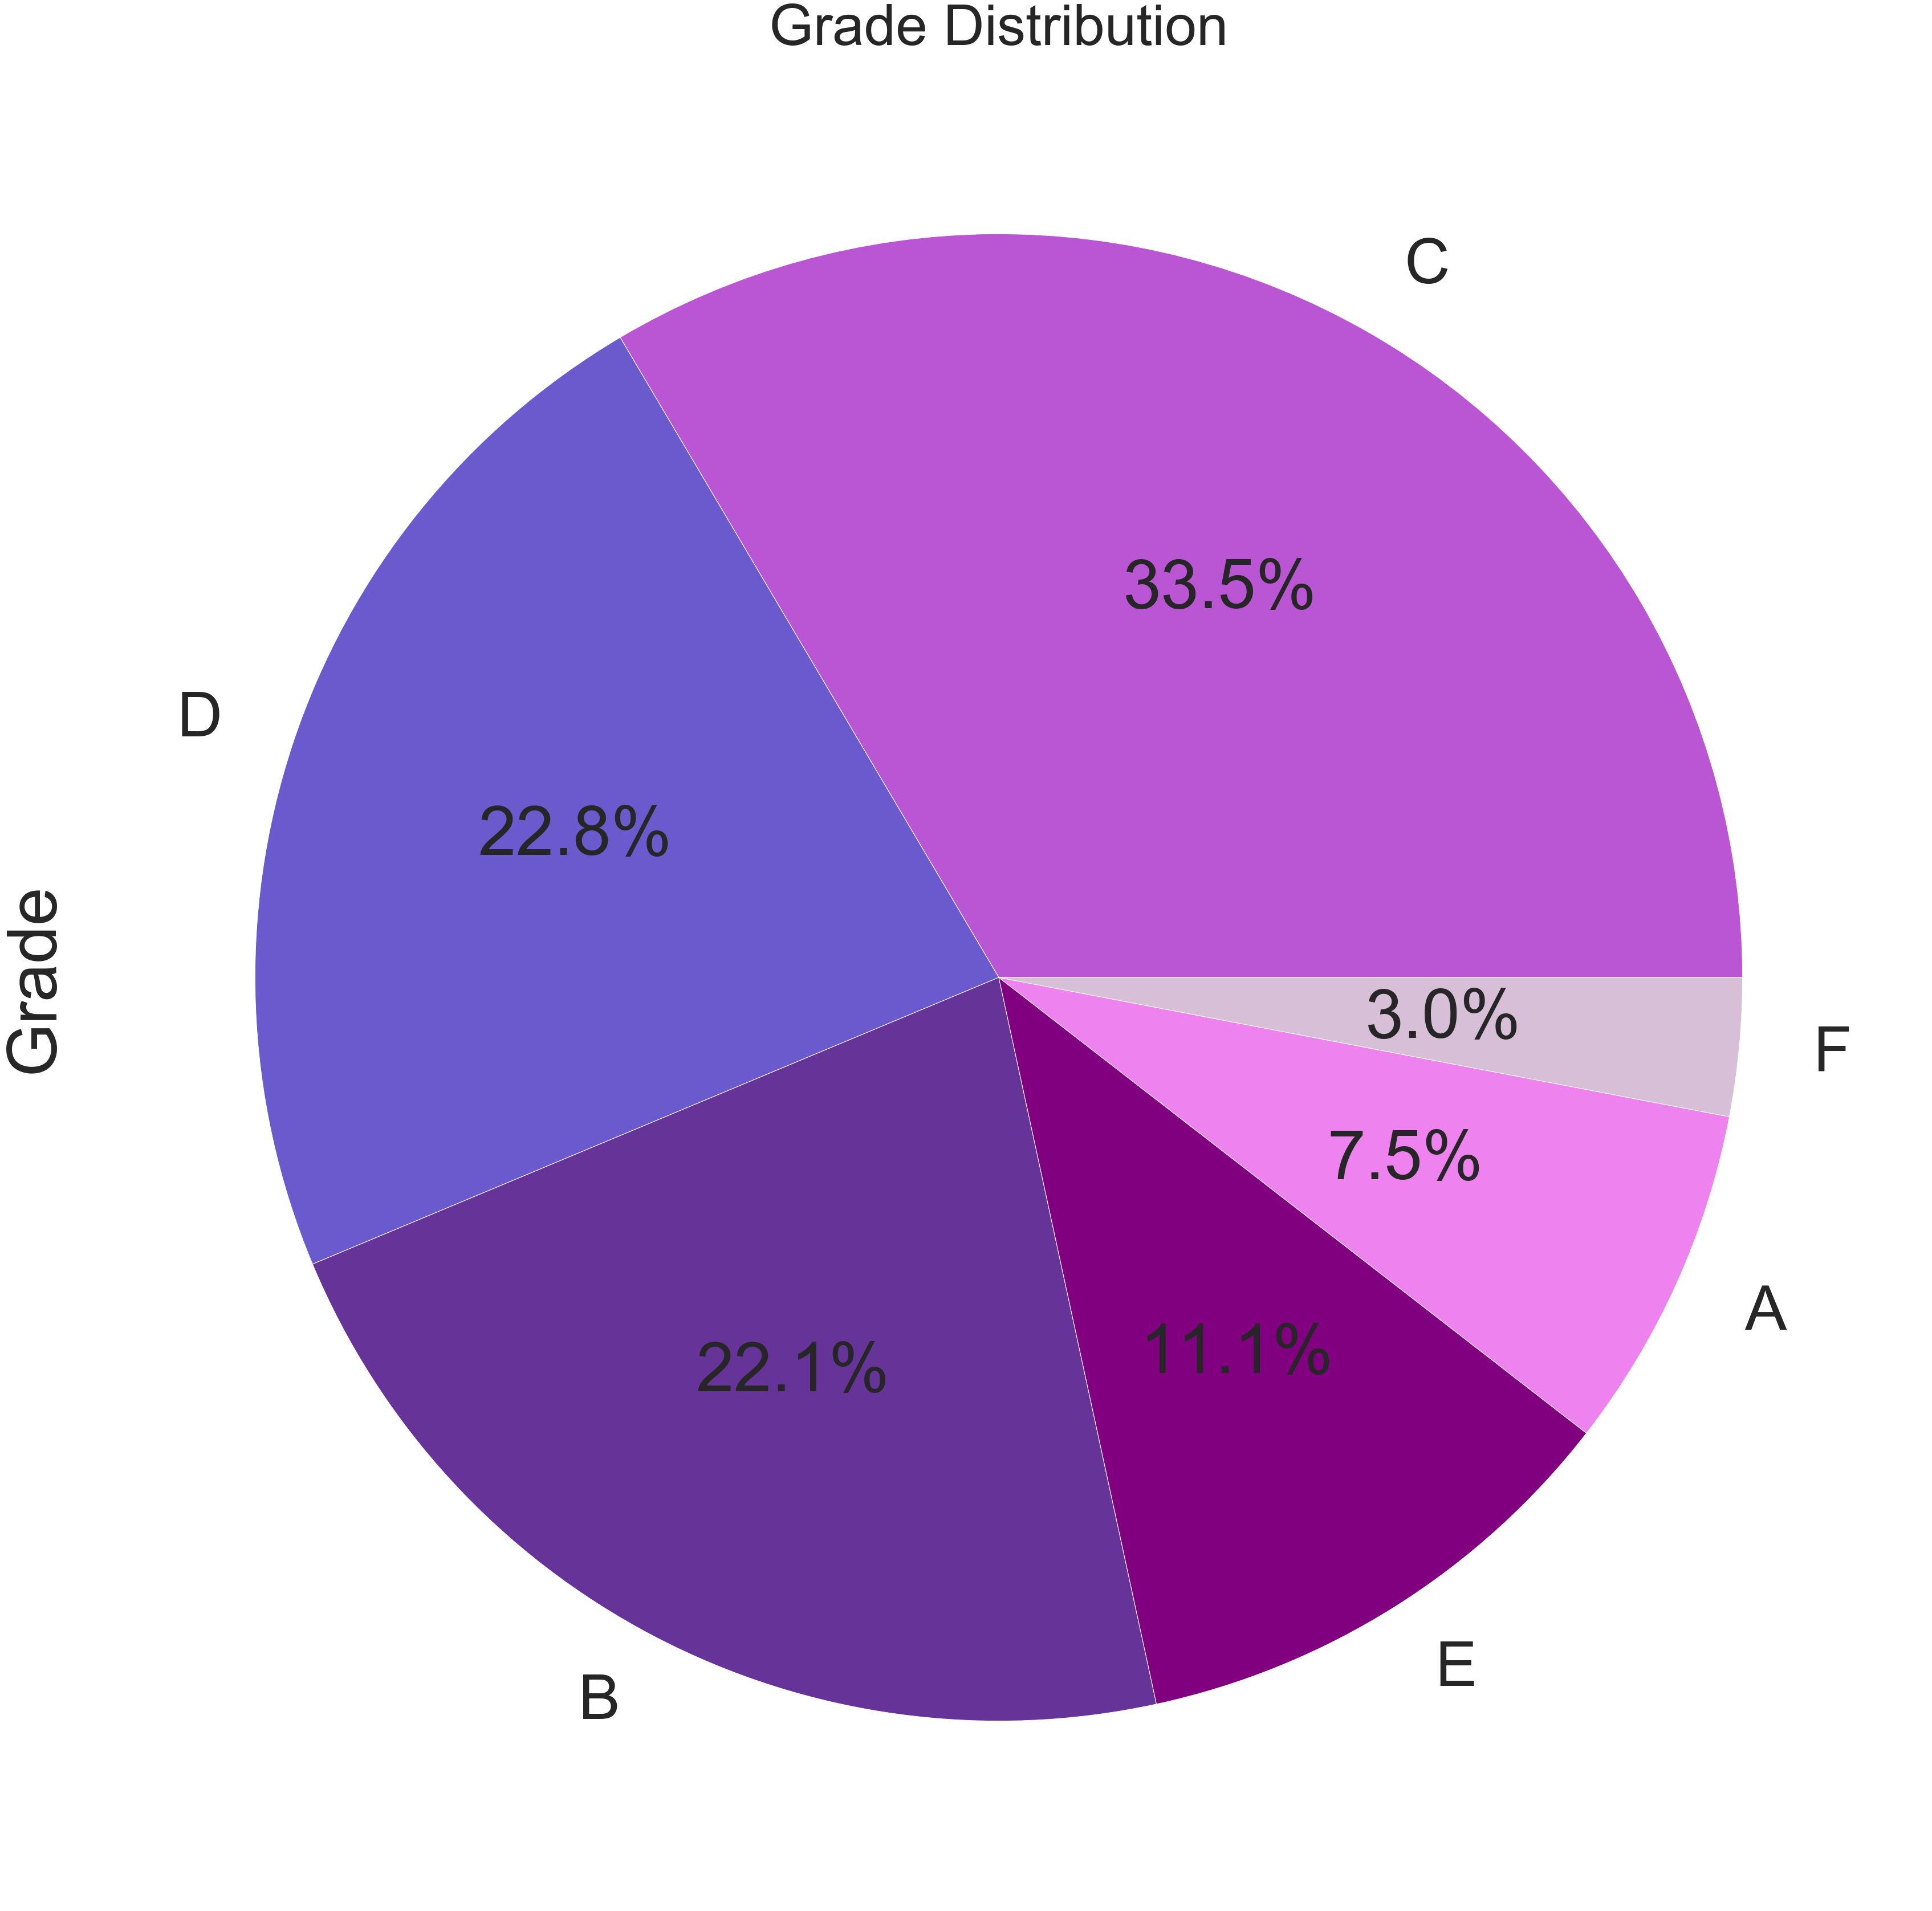

In [28]:
c=['mediumorchid','slateblue','rebeccapurple','purple','violet','thistle']
plt.title("Grade Distribution",fontsize=100)
sp['Grade'].value_counts().plot(kind='pie',autopct='%1.1f%%',colors=c)
plt.show()

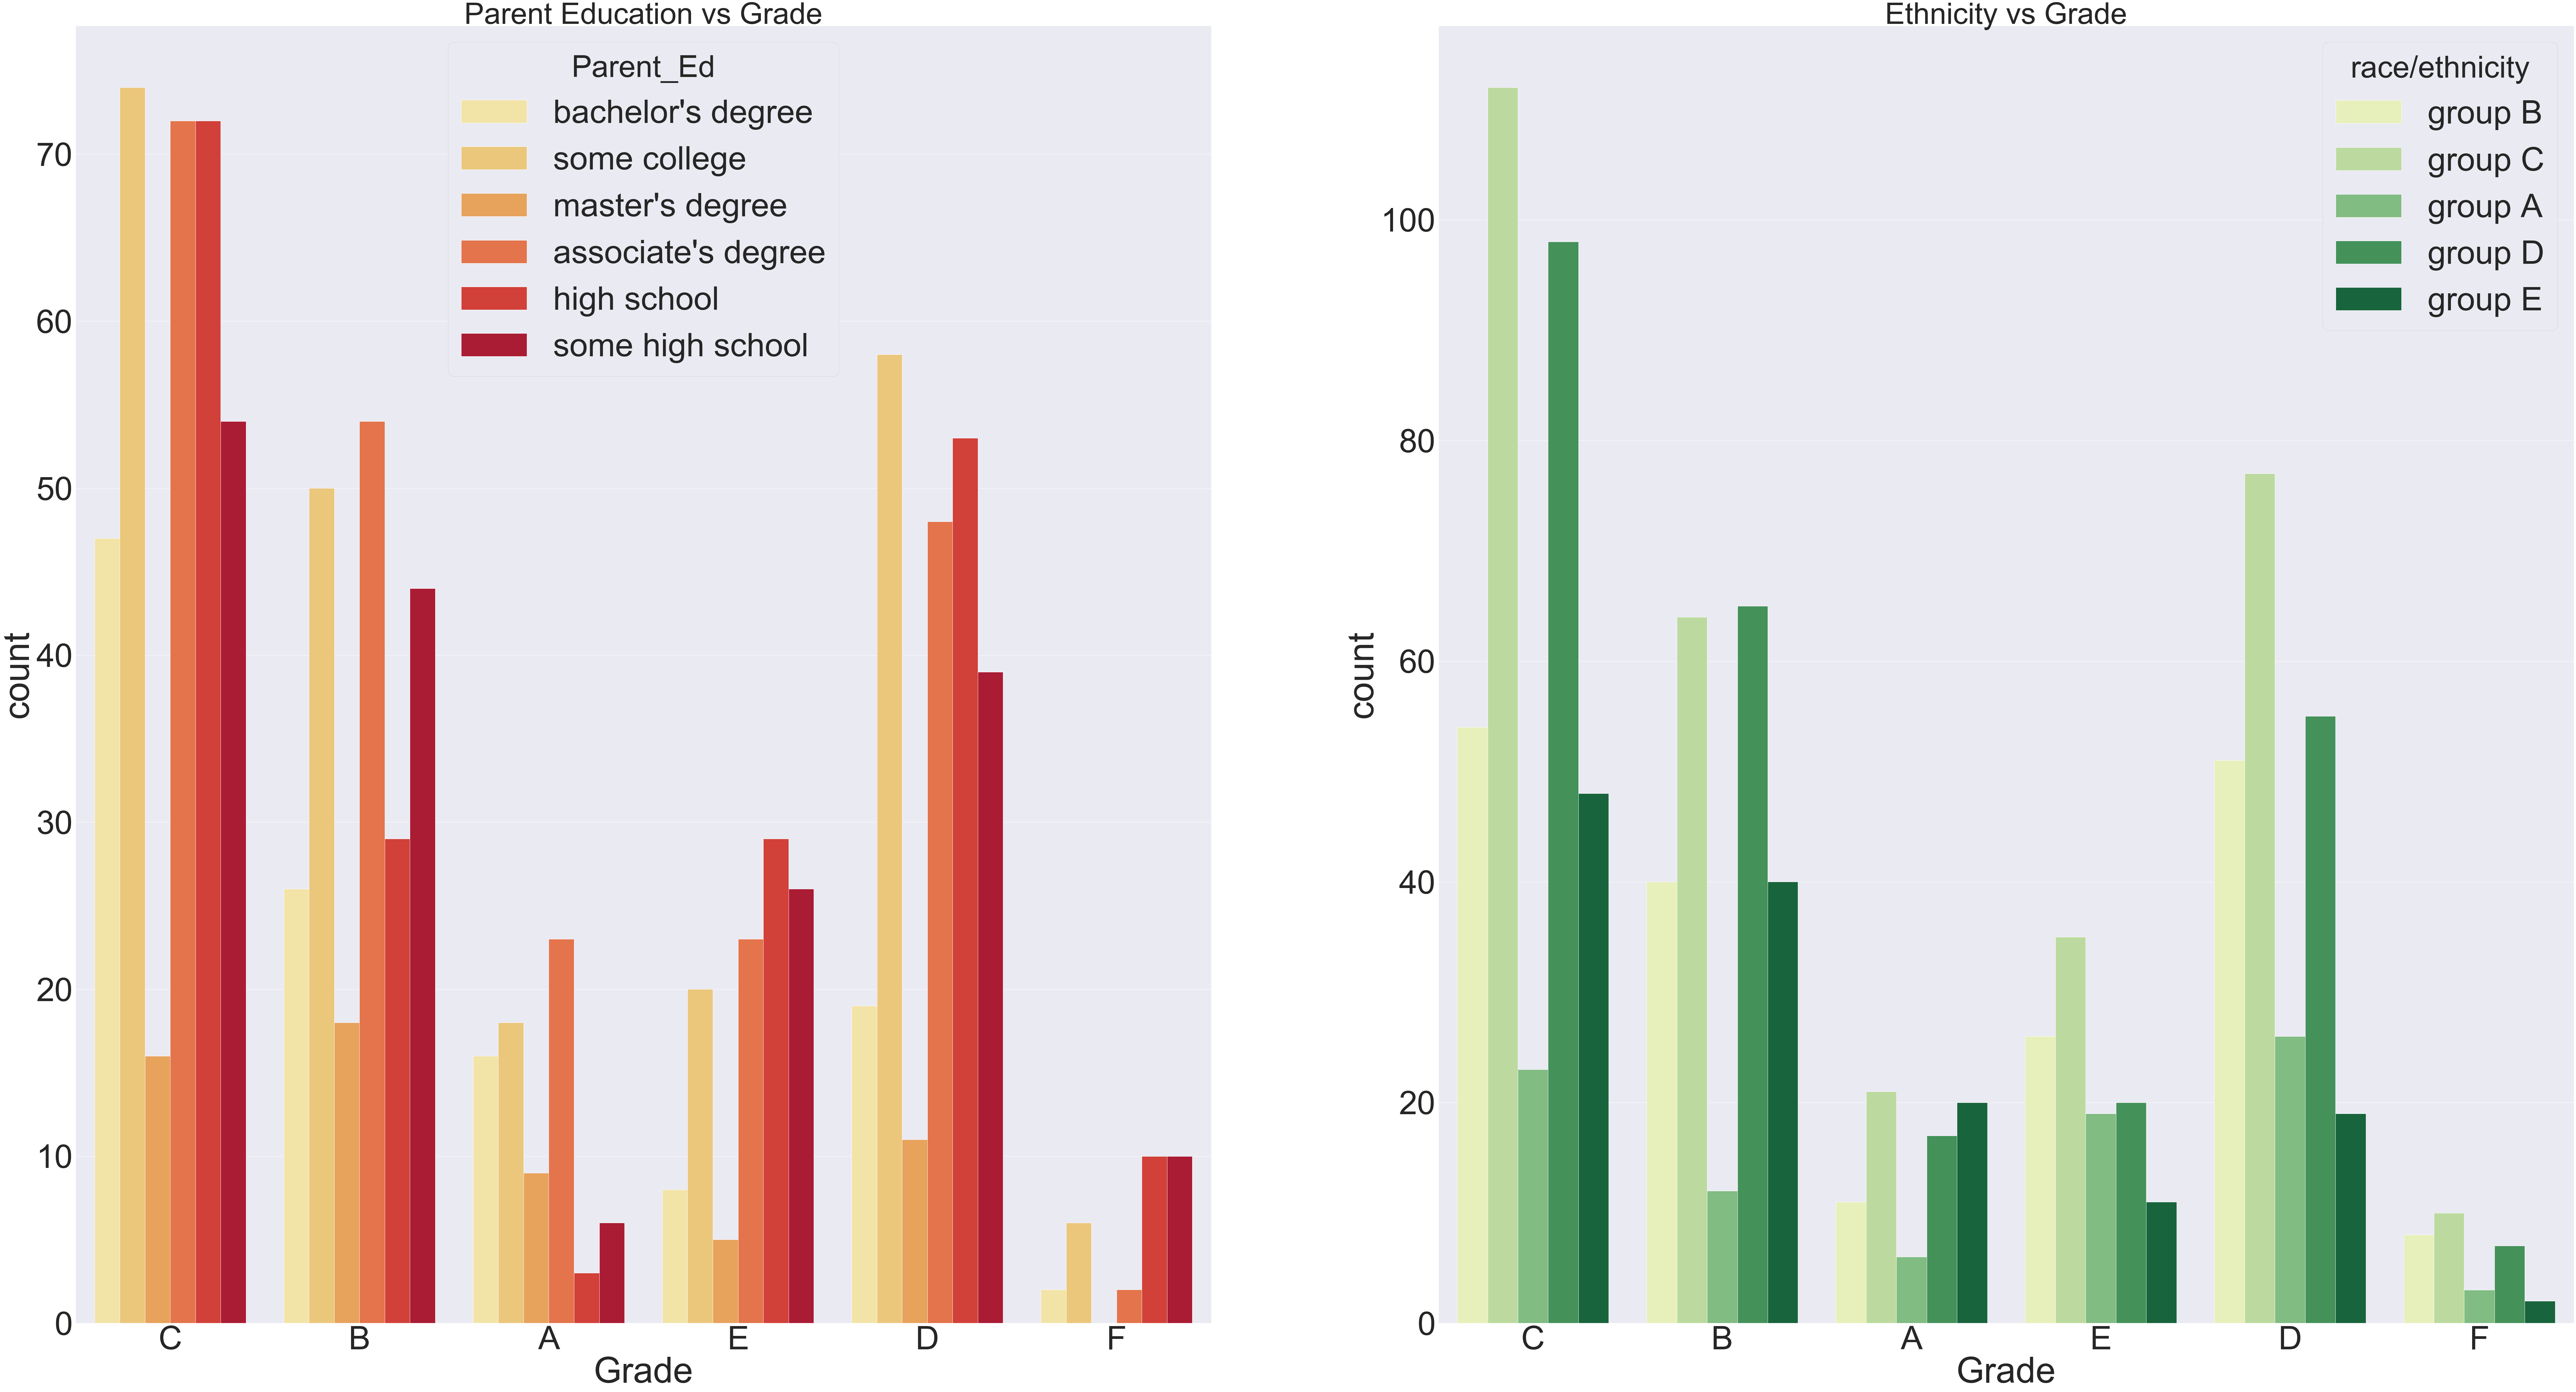

In [29]:
plt.figure(figsize=(150,80))
sns.set(font_scale=10)
plt.subplot(121)
plt.title("Parent Education vs Grade",fontsize=100)
sns.countplot(x='Grade',hue='Parent_Ed',data=sp,palette='YlOrRd')
plt.subplot(122)
plt.title("Ethnicity vs Grade",fontsize=100)
sns.countplot(x='Grade',hue='race/ethnicity',data=sp,palette='YlGn')
plt.show()

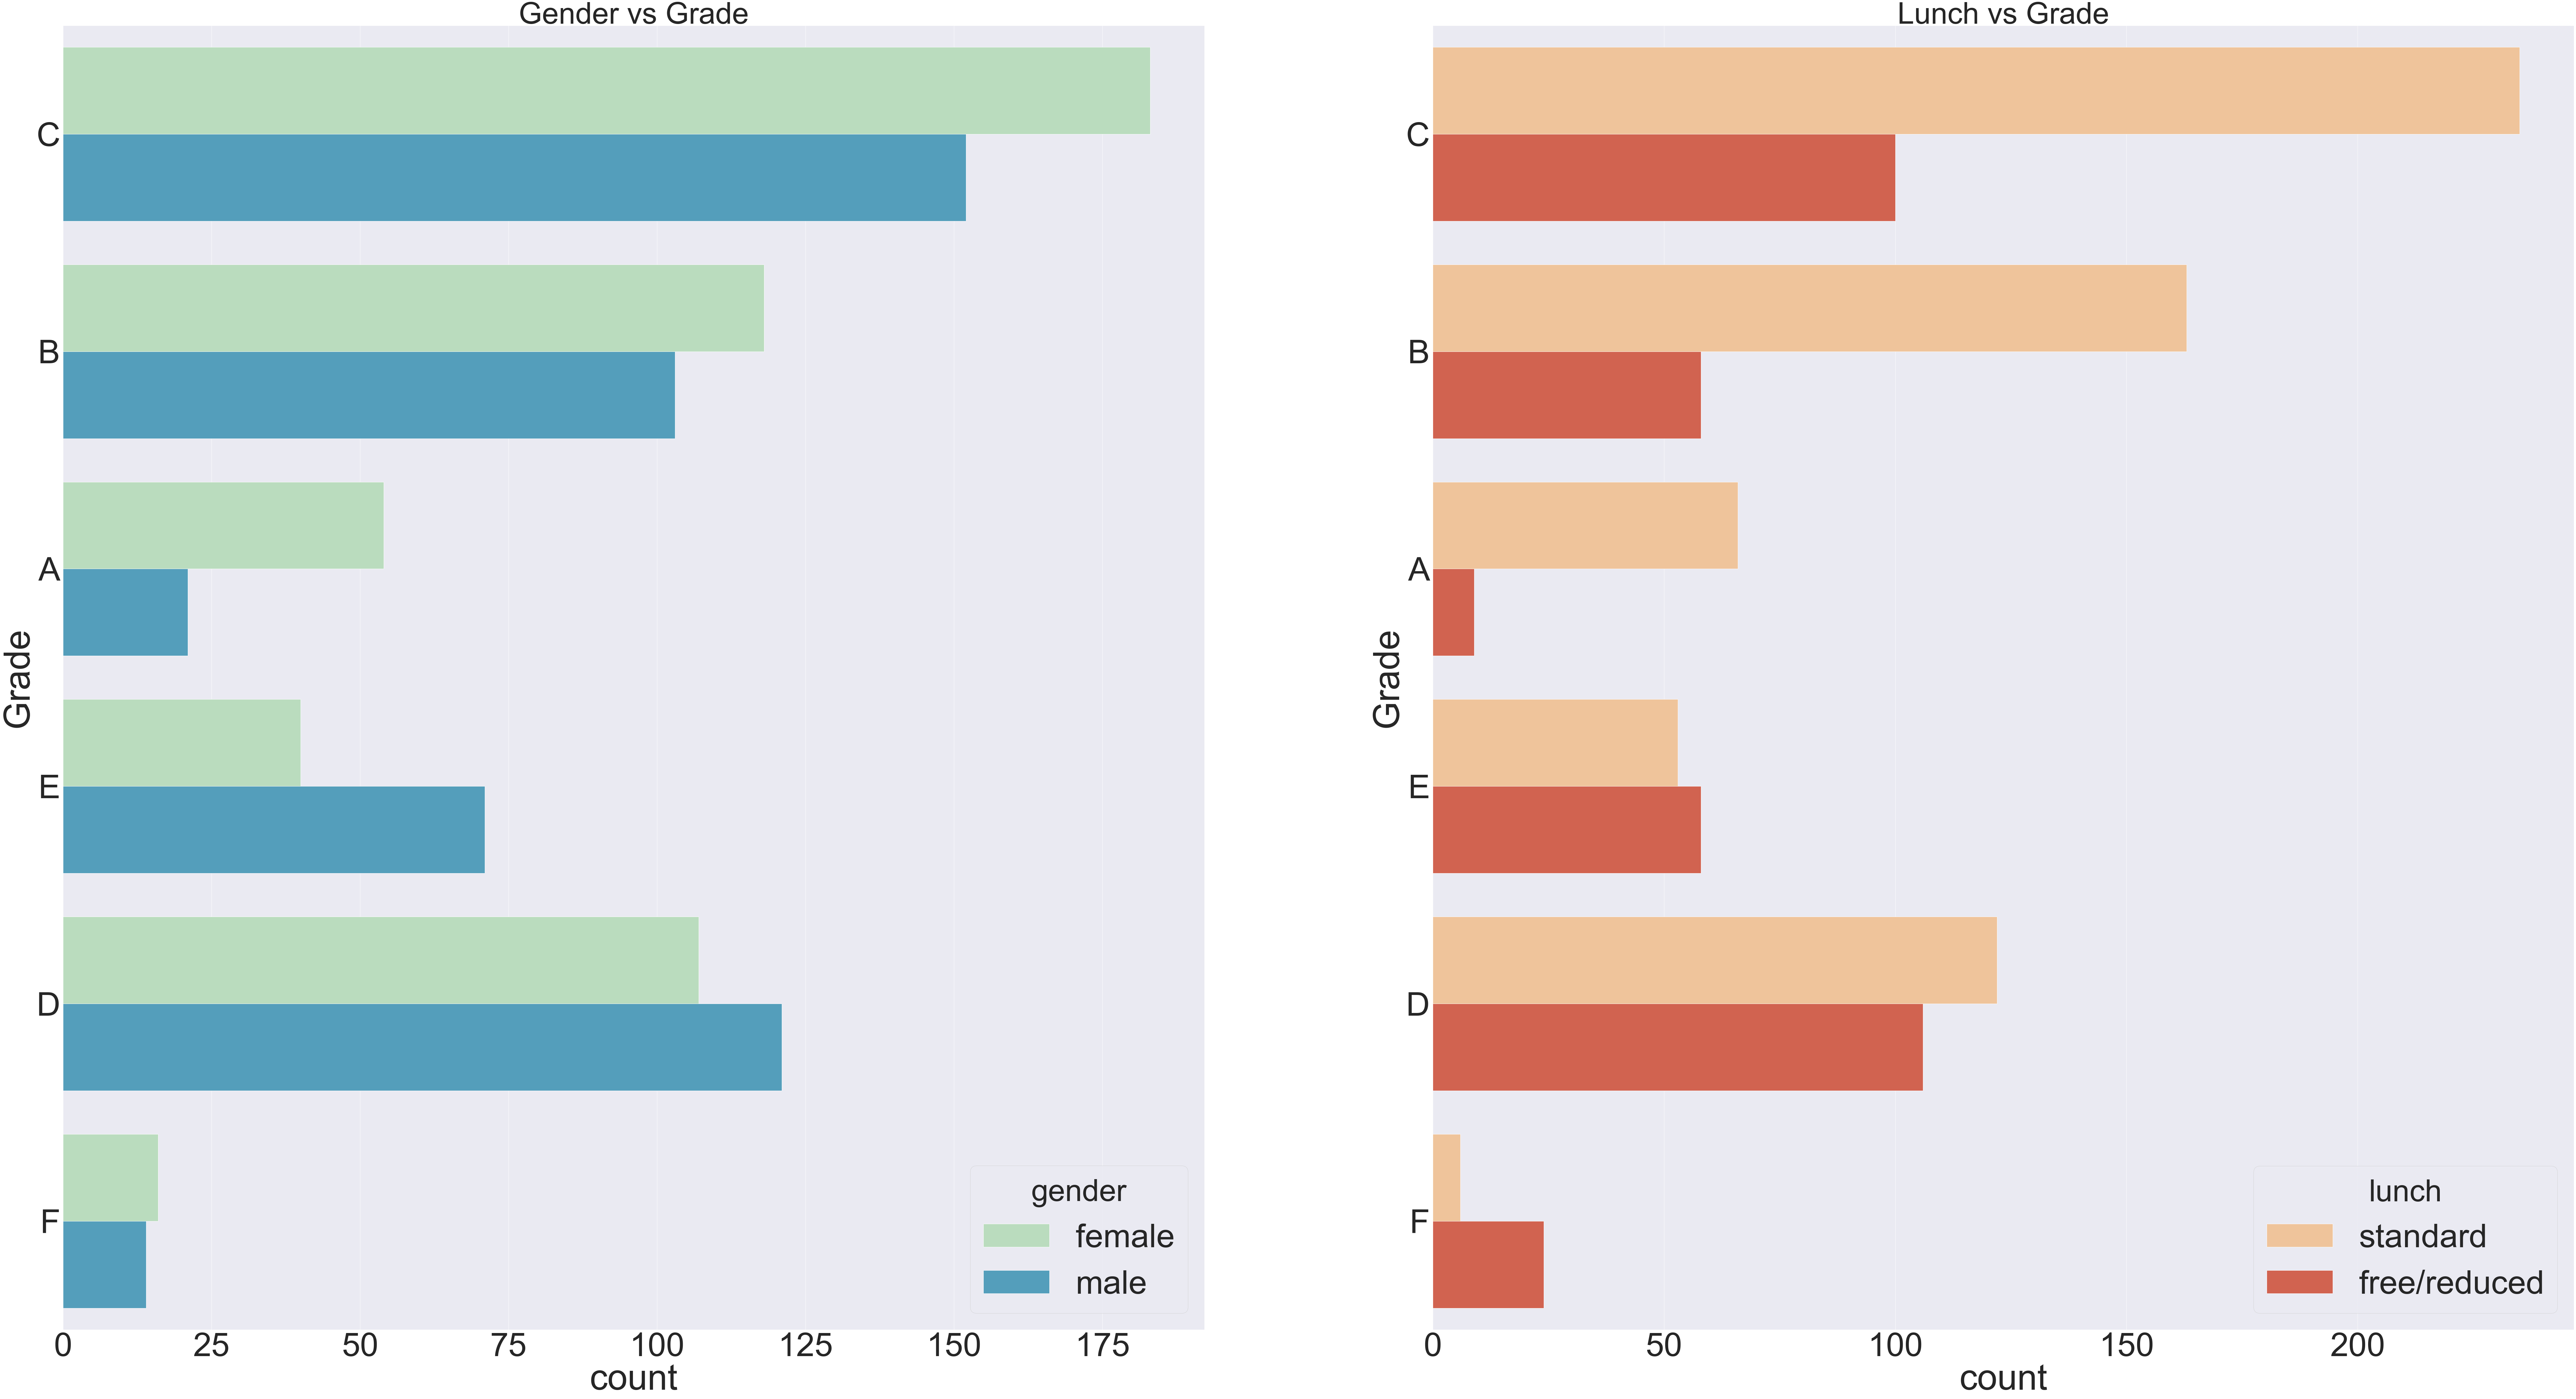

In [30]:
plt.figure(figsize=(150,80))
sns.set(font_scale=10)
plt.subplot(121)
plt.title("Gender vs Grade",fontsize=100)
sns.countplot(y='Grade',hue='gender',data=sp,palette='GnBu')
plt.subplot(122)
plt.title("Lunch vs Grade",fontsize=100)
sns.countplot(y='Grade',hue='lunch',data=sp,palette='OrRd')
plt.show()

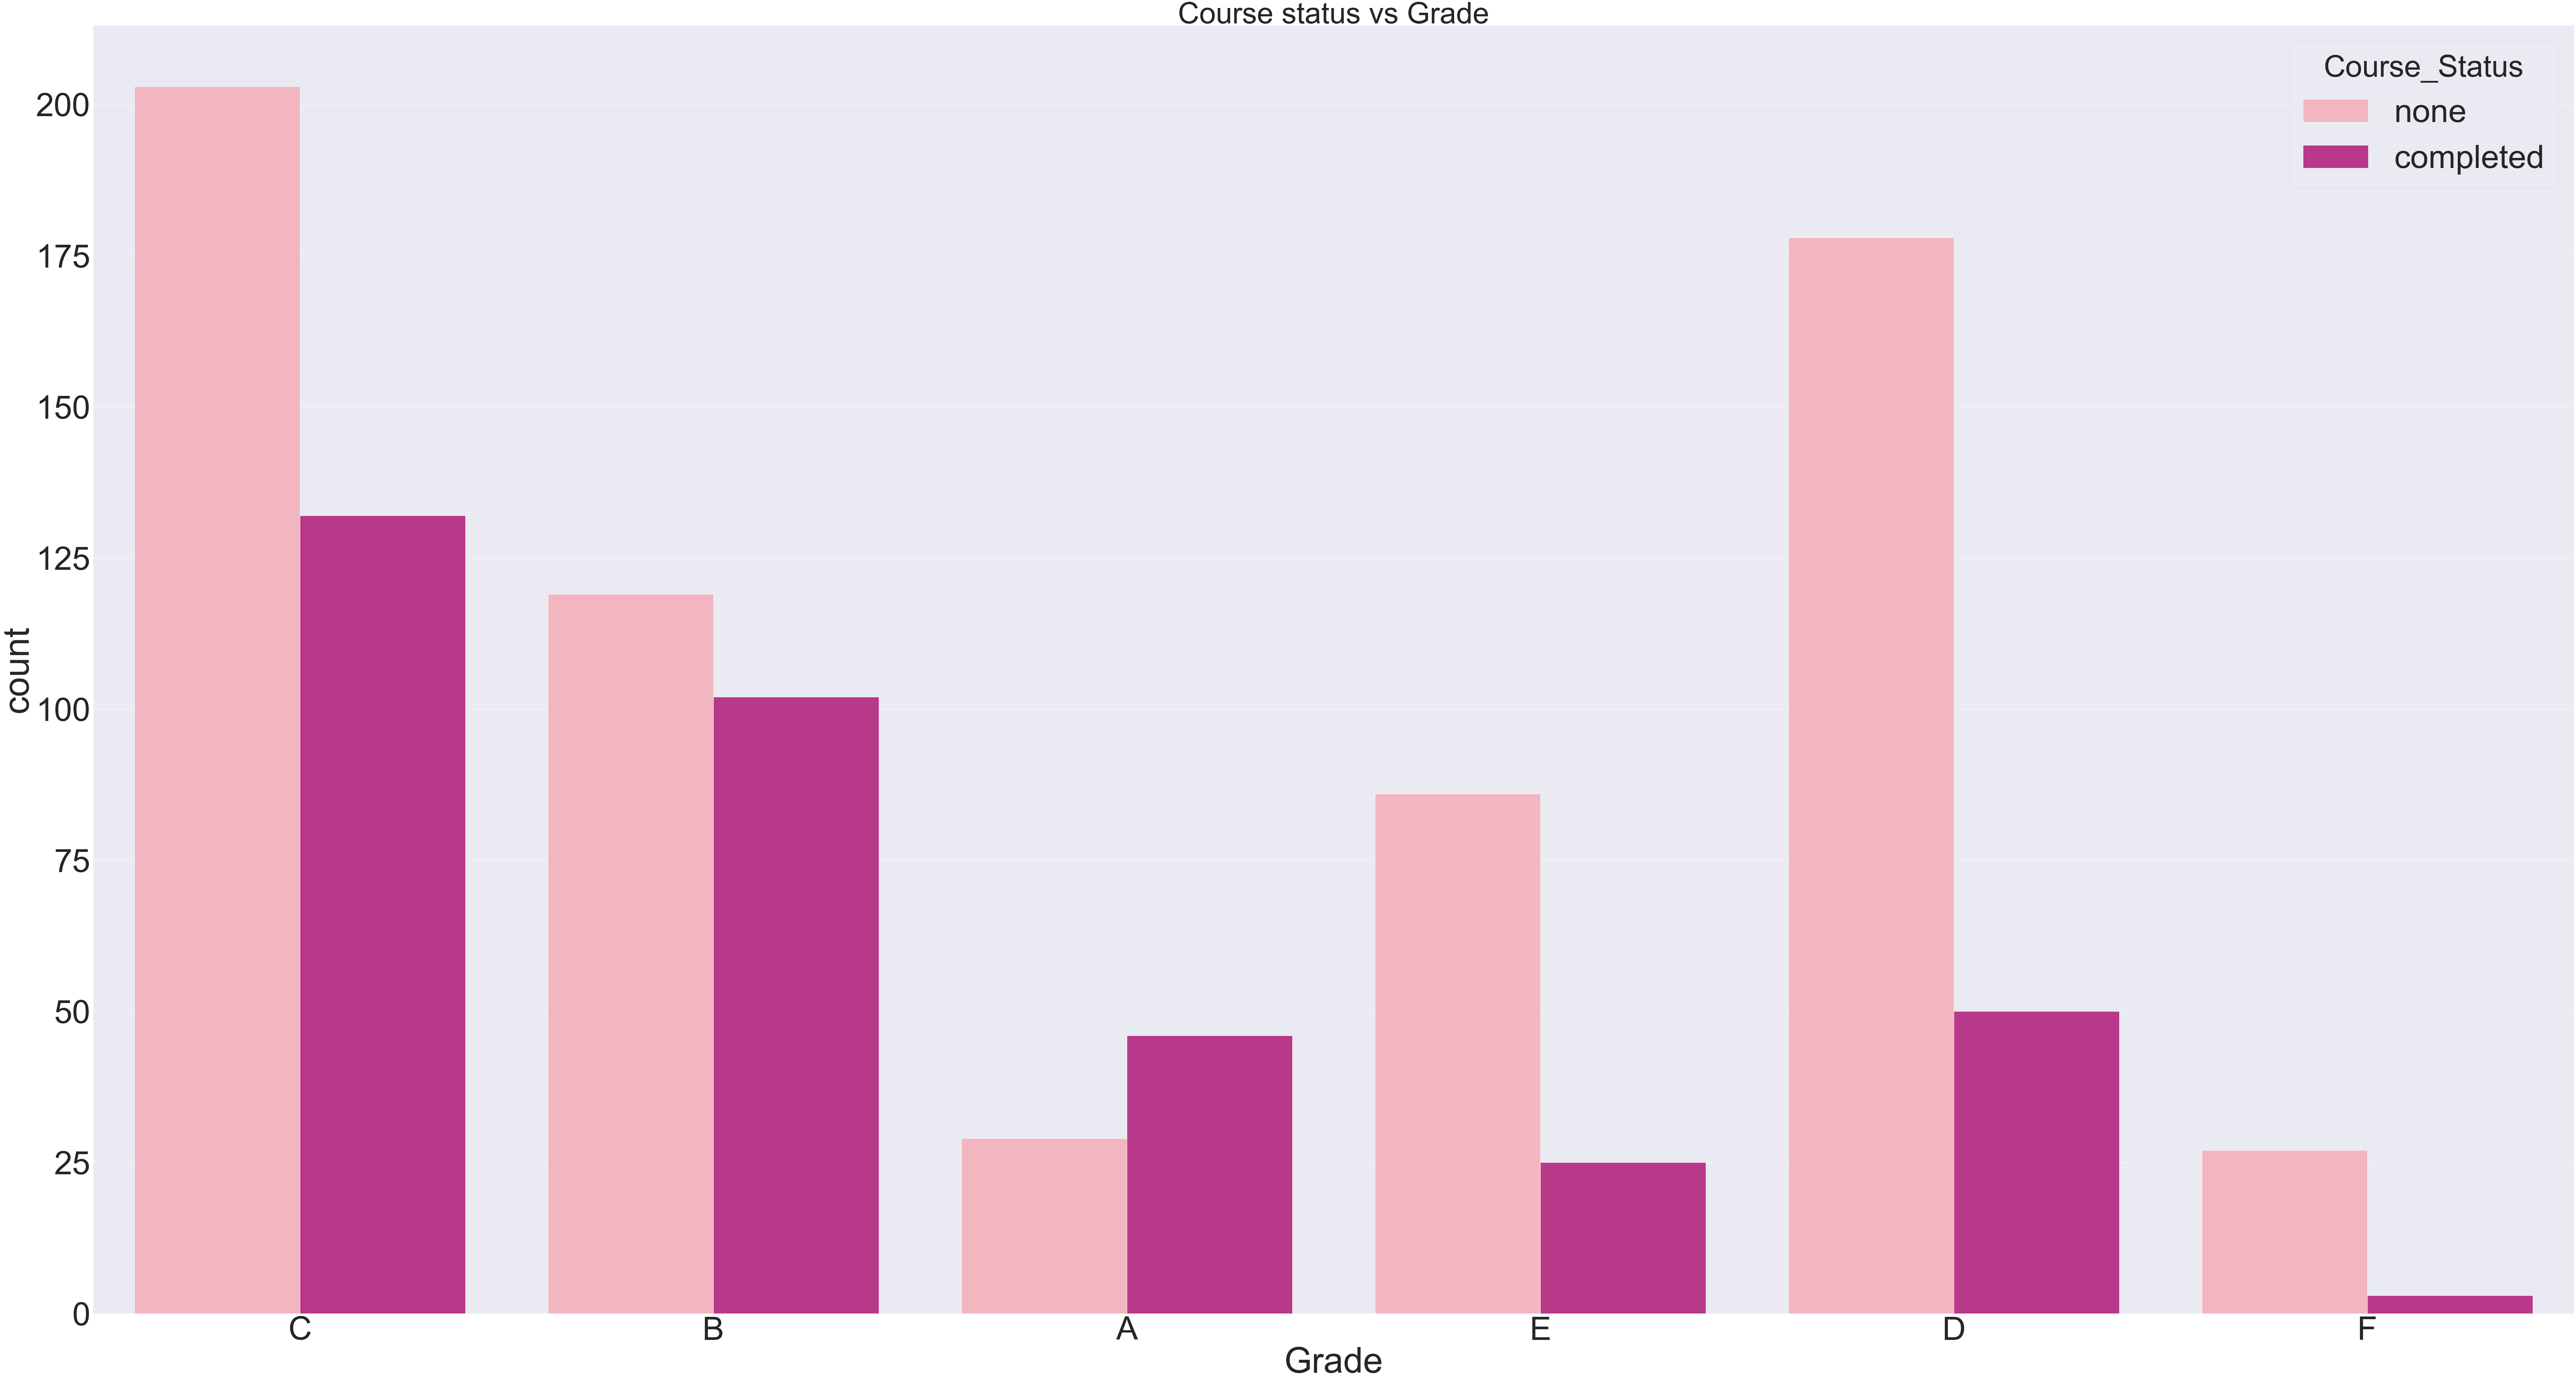

In [31]:
plt.figure(figsize=(150,80))
sns.set(font_scale=10)
plt.title("Course status vs Grade",fontsize=100)
sns.countplot(x='Grade',hue='Course_Status',data=sp,palette='RdPu')
plt.show()

## One-Third of the students received C grade